In [1]:
import os
import sys
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
data = pd.read_csv(
    "job.csv", 
    header=0, infer_datetime_format=True,
    parse_dates=['date'], index_col=['date']
).iloc[:,1:]

In [4]:
new = data.iloc[3:,:]

In [5]:
x = np.array(new.iloc[:,7:])
y = np.array(new.iloc[:,:7])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test);y_pred[:3]

array([[ 3.55078125,  9.46875   , 17.375     , 25.53125   , 33.7578125 ,
        41.79296875, 25.8125    ],
       [ 4.875     , 12.0625    , 21.25      , 30.0078125 , 38.8671875 ,
        46.0625    , 22.8125    ],
       [ 3.8984375 ,  9.625     , 18.25      , 27.6015625 , 37.7109375 ,
        45.8515625 , 24.1875    ]])

In [11]:
def youspinmerightroundbabyrightround(y_pred,y_test):
    for i in range(len(y_pred)):
        for h in range(len(y_pred[i])):
            y_pred[i][h] = round(y_pred[i][h])
    print(y_pred[:3])
    print("+++++++++++++++++++++++++++++++++")
    print(np.array(y_test[:3]))
    return y_pred

In [12]:
def boringestimation(y_test,y_pred):
    s = r2_score(y_test,y_pred)
    m = mean_squared_error(y_test,y_pred)
    n = np.sqrt(mean_squared_error(y_test,y_pred))
    print("r2:",s,";mean sqrt err:",m,";root mean sqrt err:",n)
#     return (s,m,n)

In [13]:
boringestimation(y_test,y_pred)

r2: 0.5759237659473607 ;mean sqrt err: 43.15257227572558 ;root mean sqrt err: 6.569061750031398


In [14]:
y_pred = youspinmerightroundbabyrightround(y_pred,y_test)

[[ 4.  9. 17. 26. 34. 42. 26.]
 [ 5. 12. 21. 30. 39. 46. 23.]
 [ 4. 10. 18. 28. 38. 46. 24.]]
+++++++++++++++++++++++++++++++++
[[ 6  9 17 25 33 42 27]
 [ 3  6 23 24 42 44 35]
 [ 2  5 18 21 42 48 46]]


In [15]:
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim

In [16]:
def arr2f(data):
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = float(data[i][j])
    return data

In [17]:
makeup = np.array(new.iloc[:1414,7:]).tolist()

In [18]:
model = nn.Sequential(
    nn.Linear(7, 14),
    nn.ReLU(),
    nn.Linear(14, 28),
    nn.ReLU(),
    nn.Linear(28, 56),
    nn.ReLU(),
    nn.Linear(56, 28),
    nn.ReLU(),
    nn.Linear(28, 14),
    nn.ReLU(),
    nn.Linear(14, 7)
)

In [19]:
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [20]:
import tqdm
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [21]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32)

In [30]:
n_epochs = 10   # number of epochs to run
batch_size = 1  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [31]:
best_mse = np.inf   # init to infinity
best_weights = None
history = []
import copy

In [34]:
c = 0
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            Y_batch = Y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, Y_batch)
            print(c)
            print("y_pred")
            print(y_pred)
            print("loss")
            print(loss)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
            c+=1
    # evaluate accuracy at end of each epoch
    print("@@@@@@@@@@@@@@@@@@@@@@@@@")
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, Y_test)
    mse = float(mse)
    print(mse)
    print(best_mse)
    print(y_pred)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
model.load_state_dict(best_weights)

0
y_pred
tensor([[ 6.2354, 13.9200, 21.8221, 28.5441, 34.7807, 39.7021, 22.5630]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.7836, grad_fn=<MseLossBackward0>)
1
y_pred
tensor([[ 7.4209, 17.5381, 27.6131, 35.6929, 43.3928, 49.0243, 27.9131]],
       grad_fn=<AddmmBackward0>)
loss
tensor(58.1904, grad_fn=<MseLossBackward0>)
2
y_pred
tensor([[ 9.4848, 15.5957, 21.9544, 30.1058, 36.9801, 46.3023, 25.9617]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.7094, grad_fn=<MseLossBackward0>)
3
y_pred
tensor([[ 8.5966, 15.2185, 22.0530, 29.8477, 36.5992, 44.6819, 25.1382]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.7284, grad_fn=<MseLossBackward0>)
4
y_pred
tensor([[ 6.4632, 14.6448, 22.8591, 29.8000, 36.3122, 41.3900, 23.5376]],
       grad_fn=<AddmmBackward0>)
loss
tensor(63.2718, grad_fn=<MseLossBackward0>)
5
y_pred
tensor([[ 7.5376, 11.0185, 14.7455, 20.9302, 25.8432, 33.7426, 18.8221]],
       grad_fn=<AddmmBackward0>)
loss
tensor(140.7145, grad_fn=<MseLossBackward0>)
6
y_pred


110
y_pred
tensor([[ 8.2008, 16.6367, 25.6170, 33.5825, 41.1666, 48.2995, 27.9590]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.2211, grad_fn=<MseLossBackward0>)
111
y_pred
tensor([[ 7.4942, 15.8129, 24.6444, 32.1005, 39.3029, 45.6409, 26.4848]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.5595, grad_fn=<MseLossBackward0>)
112
y_pred
tensor([[ 7.2175, 16.0029, 25.2571, 32.6988, 39.9773, 45.8602, 26.6762]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.7232, grad_fn=<MseLossBackward0>)
113
y_pred
tensor([[ 6.5049, 14.0664, 22.0287, 28.6816, 35.0725, 40.5440, 23.5696]],
       grad_fn=<AddmmBackward0>)
loss
tensor(13.8639, grad_fn=<MseLossBackward0>)
114
y_pred
tensor([[ 7.5811, 17.1714, 27.0987, 34.9558, 42.7106, 48.8241, 28.3846]],
       grad_fn=<AddmmBackward0>)
loss
tensor(100.1255, grad_fn=<MseLossBackward0>)
115
y_pred
tensor([[ 9.5327, 13.9182, 18.9085, 26.4057, 32.6856, 42.7951, 24.4095]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.2526, grad_fn=<MseLossBackward0

tensor([[ 6.8691, 11.2910, 16.0904, 22.1654, 27.4843, 34.6559, 19.7462]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.6335, grad_fn=<MseLossBackward0>)
175
y_pred
tensor([[ 7.8666, 13.9152, 20.3843, 27.6011, 34.1526, 42.0185, 24.0228]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.2605, grad_fn=<MseLossBackward0>)
176
y_pred
tensor([[ 9.8584, 15.5817, 21.8540, 30.1648, 37.4897, 47.8399, 27.1913]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.0130, grad_fn=<MseLossBackward0>)
177
y_pred
tensor([[ 7.7293, 16.0381, 24.6022, 32.3410, 39.8218, 46.8885, 26.9929]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.8239, grad_fn=<MseLossBackward0>)
178
y_pred
tensor([[ 8.0683, 12.3666, 17.1005, 23.9137, 29.7639, 38.4012, 21.7862]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.5410, grad_fn=<MseLossBackward0>)
179
y_pred
tensor([[ 8.0722, 10.8411, 13.9810, 20.2760, 25.3507, 34.5260, 19.4635]],
       grad_fn=<AddmmBackward0>)
loss
tensor(96.6639, grad_fn=<MseLossBackward0>)
180
y_pre

254
y_pred
tensor([[ 8.0044, 10.7333, 13.8796, 20.2478, 25.3853, 34.5446, 19.3844]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.0994, grad_fn=<MseLossBackward0>)
255
y_pred
tensor([[ 5.3615,  8.8129, 12.6720, 17.6842, 22.0199, 27.6701, 15.6793]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.4796, grad_fn=<MseLossBackward0>)
256
y_pred
tensor([[ 9.3228, 13.4862, 18.2057, 25.8496, 32.3243, 42.6143, 24.0040]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.1000, grad_fn=<MseLossBackward0>)
257
y_pred
tensor([[ 7.3565, 14.4789, 21.9965, 29.3661, 36.3258, 43.3485, 24.7704]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.4756, grad_fn=<MseLossBackward0>)
258
y_pred
tensor([[ 7.9651, 11.6199, 15.7197, 22.3582, 27.9330, 36.7795, 20.7301]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.3881, grad_fn=<MseLossBackward0>)
259
y_pred
tensor([[ 7.1007, 15.2533, 23.8408, 31.3535, 38.7112, 45.1008, 25.8547]],
       grad_fn=<AddmmBackward0>)
loss
tensor(4.3750, grad_fn=<MseLossBackward0>)

347
y_pred
tensor([[ 7.0910, 13.5478, 20.7917, 27.5545, 33.8692, 40.1667, 22.9501]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.3893, grad_fn=<MseLossBackward0>)
348
y_pred
tensor([[ 8.1526, 16.8007, 26.1554, 34.1584, 41.8635, 48.7611, 27.9259]],
       grad_fn=<AddmmBackward0>)
loss
tensor(119.9227, grad_fn=<MseLossBackward0>)
349
y_pred
tensor([[ 8.7719, 17.0558, 26.2372, 34.5571, 42.4340, 50.1318, 28.6678]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.1403, grad_fn=<MseLossBackward0>)
350
y_pred
tensor([[ 7.8676, 14.6313, 22.1358, 29.4605, 36.1992, 43.4025, 24.7732]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.1648, grad_fn=<MseLossBackward0>)
351
y_pred
tensor([[ 8.7604, 17.0375, 26.2210, 34.5671, 42.4398, 50.1285, 28.6588]],
       grad_fn=<AddmmBackward0>)
loss
tensor(62.3670, grad_fn=<MseLossBackward0>)
352
y_pred
tensor([[ 7.6700, 15.2846, 23.5908, 31.0745, 38.1055, 44.7916, 25.6148]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.0556, grad_fn=<MseLossBackward0>

tensor([[ 7.7809, 12.0631, 16.9362, 23.3193, 29.2255, 37.4431, 21.3399]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.1548, grad_fn=<MseLossBackward0>)
453
y_pred
tensor([[ 7.4635, 11.3403, 15.8609, 21.9885, 27.6162, 35.5354, 20.2101]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.1821, grad_fn=<MseLossBackward0>)
454
y_pred
tensor([[ 7.2399, 16.6265, 26.4601, 33.9247, 41.9767, 47.9733, 27.7968]],
       grad_fn=<AddmmBackward0>)
loss
tensor(75.2650, grad_fn=<MseLossBackward0>)
455
y_pred
tensor([[ 6.4551, 12.8026, 19.6893, 25.8634, 32.1613, 38.1268, 21.9709]],
       grad_fn=<AddmmBackward0>)
loss
tensor(115.0900, grad_fn=<MseLossBackward0>)
456
y_pred
tensor([[ 6.8398,  9.1995, 12.0707, 17.3380, 21.8814, 29.6370, 16.7619]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.7704, grad_fn=<MseLossBackward0>)
457
y_pred
tensor([[ 7.6550, 16.7952, 26.4108, 34.0365, 42.1878, 48.8100, 28.2355]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.9089, grad_fn=<MseLossBackward0>)
458
y_pr

544
y_pred
tensor([[ 5.7801, 10.0748, 14.6279, 19.7979, 24.6870, 30.4746, 17.5521]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.5237, grad_fn=<MseLossBackward0>)
545
y_pred
tensor([[ 8.9404, 17.1701, 25.4402, 33.4814, 41.5499, 49.9989, 28.9226]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.1081, grad_fn=<MseLossBackward0>)
546
y_pred
tensor([[ 8.3300, 15.2482, 22.2223, 29.5457, 36.7184, 44.8481, 25.8923]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.8401, grad_fn=<MseLossBackward0>)
547
y_pred
tensor([[ 7.8665, 11.9187, 16.2119, 22.5350, 28.2437, 36.6603, 20.9579]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.2273, grad_fn=<MseLossBackward0>)
548
y_pred
tensor([[ 6.5315, 11.8507, 17.1789, 22.9940, 28.5610, 35.0584, 20.2483]],
       grad_fn=<AddmmBackward0>)
loss
tensor(99.3724, grad_fn=<MseLossBackward0>)
549
y_pred
tensor([[ 8.9187, 17.0386, 25.2973, 33.3502, 41.4382, 49.7953, 28.7779]],
       grad_fn=<AddmmBackward0>)
loss
tensor(66.7103, grad_fn=<MseLossBackward0>

625
y_pred
tensor([[ 7.6030, 14.7358, 22.3843, 29.4349, 36.6960, 43.4805, 25.1842]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.0798, grad_fn=<MseLossBackward0>)
626
y_pred
tensor([[ 8.9249, 16.2394, 24.1469, 32.0030, 39.9774, 48.2972, 27.9147]],
       grad_fn=<AddmmBackward0>)
loss
tensor(70.7571, grad_fn=<MseLossBackward0>)
627
y_pred
tensor([[ 8.6345, 18.9778, 29.6077, 38.0420, 47.1915, 54.2610, 31.5962]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.6208, grad_fn=<MseLossBackward0>)
628
y_pred
tensor([[ 7.3791, 17.4643, 27.8416, 35.4509, 43.8709, 49.5357, 28.9834]],
       grad_fn=<AddmmBackward0>)
loss
tensor(94.4614, grad_fn=<MseLossBackward0>)
629
y_pred
tensor([[ 8.4371, 14.2635, 20.6491, 27.8034, 34.8275, 43.0989, 24.8435]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.8770, grad_fn=<MseLossBackward0>)
630
y_pred
tensor([[ 7.5461, 11.2220, 15.3741, 21.3852, 26.9202, 34.9053, 20.0001]],
       grad_fn=<AddmmBackward0>)
loss
tensor(85.0781, grad_fn=<MseLossBackward0>)

tensor([[ 7.5313, 18.3295, 29.3529, 37.4128, 46.2853, 51.7669, 30.3284]],
       grad_fn=<AddmmBackward0>)
loss
tensor(208.1715, grad_fn=<MseLossBackward0>)
678
y_pred
tensor([[ 6.7557, 11.4810, 16.4979, 22.4396, 28.0797, 34.7311, 20.0324]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.2417, grad_fn=<MseLossBackward0>)
679
y_pred
tensor([[ 7.2535, 17.5210, 27.9611, 35.7290, 44.2115, 49.5312, 28.9816]],
       grad_fn=<AddmmBackward0>)
loss
tensor(96.4866, grad_fn=<MseLossBackward0>)
680
y_pred
tensor([[ 7.8009, 17.0676, 26.5044, 34.3527, 42.6392, 48.9429, 28.4863]],
       grad_fn=<AddmmBackward0>)
loss
tensor(42.5262, grad_fn=<MseLossBackward0>)
681
y_pred
tensor([[ 6.5699, 13.4682, 20.5975, 27.0253, 33.6099, 39.2420, 22.7956]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.8349, grad_fn=<MseLossBackward0>)
682
y_pred
tensor([[ 8.0937, 12.4291, 17.0416, 23.6395, 29.7067, 38.0912, 21.8244]],
       grad_fn=<AddmmBackward0>)
loss
tensor(13.3200, grad_fn=<MseLossBackward0>)
683
y_pr

731
y_pred
tensor([[ 8.6842, 17.5268, 26.7100, 34.7827, 43.4210, 50.8000, 29.3441]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.2124, grad_fn=<MseLossBackward0>)
732
y_pred
tensor([[ 6.7305, 12.7581, 19.0131, 25.1855, 31.4943, 37.6027, 21.6631]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.3966, grad_fn=<MseLossBackward0>)
733
y_pred
tensor([[ 8.8357, 14.9440, 21.4063, 28.8058, 36.1911, 44.7510, 25.6439]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.3404, grad_fn=<MseLossBackward0>)
734
y_pred
tensor([[ 6.3801, 14.4150, 22.6718, 29.1964, 36.3289, 41.2832, 23.9520]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.8441, grad_fn=<MseLossBackward0>)
735
y_pred
tensor([[ 7.1557, 15.5165, 24.1825, 31.2366, 38.9163, 44.6639, 25.8864]],
       grad_fn=<AddmmBackward0>)
loss
tensor(65.1935, grad_fn=<MseLossBackward0>)
736
y_pred
tensor([[ 6.2264,  9.6322, 13.4619, 18.6438, 23.5418, 29.8968, 17.0616]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.5025, grad_fn=<MseLossBackward0>

815
y_pred
tensor([[ 7.2547, 14.7593, 22.9805, 29.7671, 36.9557, 43.1686, 24.9615]],
       grad_fn=<AddmmBackward0>)
loss
tensor(38.1337, grad_fn=<MseLossBackward0>)
816
y_pred
tensor([[ 7.5868, 14.6902, 22.7327, 29.6440, 36.9084, 43.5418, 25.1197]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.5333, grad_fn=<MseLossBackward0>)
817
y_pred
tensor([[ 8.8365, 17.5428, 27.1730, 35.1775, 43.7292, 51.3439, 29.6401]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.7485, grad_fn=<MseLossBackward0>)
818
y_pred
tensor([[ 6.4671, 14.2650, 22.7661, 29.1788, 36.1590, 41.2847, 23.9206]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.5231, grad_fn=<MseLossBackward0>)
819
y_pred
tensor([[ 7.3903, 13.5276, 20.5948, 27.1571, 33.8980, 40.6039, 23.3388]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.9909, grad_fn=<MseLossBackward0>)
820
y_pred
tensor([[ 6.3673, 11.3093, 17.0145, 22.6408, 28.2745, 34.2420, 19.6610]],
       grad_fn=<AddmmBackward0>)
loss
tensor(60.4369, grad_fn=<MseLossBackward0>

920
y_pred
tensor([[ 9.4723, 18.5785, 29.0623, 37.2222, 46.3081, 54.5561, 31.6115]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.1585, grad_fn=<MseLossBackward0>)
921
y_pred
tensor([[ 8.5922, 14.1342, 20.8019, 27.5331, 34.4715, 42.9655, 24.6935]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.4197, grad_fn=<MseLossBackward0>)
922
y_pred
tensor([[ 6.7287, 12.4350, 19.2264, 25.0246, 31.2046, 37.3558, 21.5945]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.0665, grad_fn=<MseLossBackward0>)
923
y_pred
tensor([[ 7.0307, 15.8410, 25.6028, 32.2434, 39.8683, 45.4459, 26.4821]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.1268, grad_fn=<MseLossBackward0>)
924
y_pred
tensor([[ 9.7196, 18.4395, 28.5902, 36.7783, 45.7784, 54.4506, 31.4907]],
       grad_fn=<AddmmBackward0>)
loss
tensor(73.4885, grad_fn=<MseLossBackward0>)
925
y_pred
tensor([[ 7.0680, 16.3682, 26.8957, 33.7032, 41.6658, 46.9781, 27.4084]],
       grad_fn=<AddmmBackward0>)
loss
tensor(98.7737, grad_fn=<MseLossBackward0>)

1032
y_pred
tensor([[ 8.4798, 12.2459, 16.9997, 23.5415, 29.2321, 38.2955, 21.8192]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.1207, grad_fn=<MseLossBackward0>)
1033
y_pred
tensor([[ 6.0566, 12.6110, 19.9836, 25.8698, 31.6420, 36.8498, 21.3653]],
       grad_fn=<AddmmBackward0>)
loss
tensor(42.1827, grad_fn=<MseLossBackward0>)
1034
y_pred
tensor([[ 7.2095, 13.7017, 21.1961, 27.7411, 34.0508, 40.6155, 23.4462]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.5970, grad_fn=<MseLossBackward0>)
1035
y_pred
tensor([[ 7.7061, 16.2631, 25.8162, 33.1731, 40.5376, 47.0533, 27.2803]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.8300, grad_fn=<MseLossBackward0>)
1036
y_pred
tensor([[ 6.8724, 13.6801, 21.4141, 27.8359, 34.0733, 40.1941, 23.2606]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.7406, grad_fn=<MseLossBackward0>)
1037
y_pred
tensor([[ 8.0815, 16.2364, 25.4655, 32.8810, 40.2334, 47.3424, 27.4017]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.3516, grad_fn=<MseLossBackw

1121
y_pred
tensor([[ 7.4646, 17.0004, 26.8042, 34.3330, 41.6959, 47.8207, 27.6786]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.9440, grad_fn=<MseLossBackward0>)
1122
y_pred
tensor([[ 8.0505, 17.4892, 27.1726, 34.9544, 42.4519, 49.3839, 28.5778]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.5480, grad_fn=<MseLossBackward0>)
1123
y_pred
tensor([[ 7.7789, 11.9651, 16.5851, 22.8506, 28.1459, 36.4214, 20.7415]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.1479, grad_fn=<MseLossBackward0>)
1124
y_pred
tensor([[ 7.5553, 16.4145, 25.5642, 32.9328, 39.9999, 46.4654, 26.8820]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.7505, grad_fn=<MseLossBackward0>)
1125
y_pred
tensor([[ 8.3724, 19.1241, 30.0602, 38.3371, 46.4513, 53.3398, 30.9237]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.1100, grad_fn=<MseLossBackward0>)
1126
y_pred
tensor([[ 7.4146, 17.5867, 28.0671, 35.6595, 43.1853, 49.0023, 28.4606]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.0466, grad_fn=<MseLossBack

1232
y_pred
tensor([[ 8.8991, 14.7406, 20.9341, 28.3855, 34.9191, 43.4888, 24.5106]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.2442, grad_fn=<MseLossBackward0>)
1233
y_pred
tensor([[ 7.9749, 17.6348, 27.5391, 35.5592, 43.2599, 49.3130, 28.1534]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.7357, grad_fn=<MseLossBackward0>)
1234
y_pred
tensor([[ 7.2177, 14.6051, 22.2302, 29.1597, 35.5788, 41.5762, 23.6360]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.1787, grad_fn=<MseLossBackward0>)
1235
y_pred
tensor([[ 7.5293, 16.3507, 25.5441, 33.1605, 40.4126, 46.1333, 26.2759]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.0200, grad_fn=<MseLossBackward0>)
1236
y_pred
tensor([[ 8.7379, 11.3682, 14.4802, 21.0285, 26.2152, 35.7242, 19.8566]],
       grad_fn=<AddmmBackward0>)
loss
tensor(76.9538, grad_fn=<MseLossBackward0>)
1237
y_pred
tensor([[ 7.0829, 15.0823, 23.3435, 30.4251, 37.0718, 42.6478, 24.2734]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.4840, grad_fn=<MseLossBack

1341
y_pred
tensor([[ 7.0857, 15.3701, 23.9224, 31.4975, 38.5879, 44.4014, 25.2955]],
       grad_fn=<AddmmBackward0>)
loss
tensor(99.6494, grad_fn=<MseLossBackward0>)
1342
y_pred
tensor([[ 6.5171, 14.4925, 22.7273, 29.8160, 36.4940, 41.7392, 23.8068]],
       grad_fn=<AddmmBackward0>)
loss
tensor(91.7928, grad_fn=<MseLossBackward0>)
1343
y_pred
tensor([[ 8.0610, 13.0801, 18.5061, 25.6985, 31.8516, 39.9898, 22.4998]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.5521, grad_fn=<MseLossBackward0>)
1344
y_pred
tensor([[ 6.5770, 15.6744, 25.1279, 32.6144, 39.8592, 44.7311, 25.5760]],
       grad_fn=<AddmmBackward0>)
loss
tensor(92.7204, grad_fn=<MseLossBackward0>)
1345
y_pred
tensor([[ 7.7014, 17.9852, 28.4639, 36.9317, 45.1016, 51.0370, 29.1668]],
       grad_fn=<AddmmBackward0>)
loss
tensor(125.3302, grad_fn=<MseLossBackward0>)
1346
y_pred
tensor([[ 6.6700, 10.5362, 14.9092, 20.8892, 25.9304, 32.7635, 18.4353]],
       grad_fn=<AddmmBackward0>)
loss
tensor(57.2232, grad_fn=<MseLossBac

1450
y_pred
tensor([[ 8.8348, 14.6733, 20.8966, 29.0477, 36.0929, 45.0633, 25.1281]],
       grad_fn=<AddmmBackward0>)
loss
tensor(61.6085, grad_fn=<MseLossBackward0>)
1451
y_pred
tensor([[ 6.7176, 11.8791, 17.3808, 23.9718, 29.7079, 36.3170, 20.3192]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.2486, grad_fn=<MseLossBackward0>)
1452
y_pred
tensor([[ 8.0110, 12.7826, 17.8536, 25.0976, 31.2251, 39.6090, 22.0634]],
       grad_fn=<AddmmBackward0>)
loss
tensor(97.0084, grad_fn=<MseLossBackward0>)
1453
y_pred
tensor([[ 6.3179, 15.3648, 24.4889, 31.9967, 39.1827, 44.0397, 24.9084]],
       grad_fn=<AddmmBackward0>)
loss
tensor(54.4327, grad_fn=<MseLossBackward0>)
1454
y_pred
tensor([[ 7.9374, 13.2892, 18.9507, 26.3224, 32.6788, 40.7552, 22.7504]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.0474, grad_fn=<MseLossBackward0>)
1455
y_pred
tensor([[ 6.5940, 15.5976, 24.7579, 32.4581, 39.7897, 44.9556, 25.4032]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.7771, grad_fn=<MseLossBack

1544
y_pred
tensor([[ 7.6523, 18.3050, 29.4301, 38.0248, 46.5106, 52.7584, 30.4271]],
       grad_fn=<AddmmBackward0>)
loss
tensor(106.1938, grad_fn=<MseLossBackward0>)
1545
y_pred
tensor([[ 6.1374, 12.3396, 19.0779, 25.3982, 31.2659, 37.0412, 21.2432]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.3386, grad_fn=<MseLossBackward0>)
1546
y_pred
tensor([[ 6.5273, 14.4677, 22.9564, 30.0395, 36.8441, 42.5463, 24.4984]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.2742, grad_fn=<MseLossBackward0>)
1547
y_pred
tensor([[ 7.3753, 11.6296, 16.6671, 23.2683, 28.9908, 36.8497, 20.8955]],
       grad_fn=<AddmmBackward0>)
loss
tensor(42.8620, grad_fn=<MseLossBackward0>)
1548
y_pred
tensor([[ 6.0654, 14.4122, 23.2831, 30.2333, 36.9991, 42.0103, 24.2512]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.5193, grad_fn=<MseLossBackward0>)
1549
y_pred
tensor([[ 7.1849, 14.3902, 22.1072, 29.4068, 36.1912, 43.0019, 24.6401]],
       grad_fn=<AddmmBackward0>)
loss
tensor(5.9716, grad_fn=<MseLossBack

1661
y_pred
tensor([[ 7.3150, 14.0303, 21.2382, 28.7079, 35.6271, 42.7932, 24.2674]],
       grad_fn=<AddmmBackward0>)
loss
tensor(121.5877, grad_fn=<MseLossBackward0>)
1662
y_pred
tensor([[ 7.7676, 10.7918, 14.1994, 20.6908, 26.0497, 35.1115, 19.6558]],
       grad_fn=<AddmmBackward0>)
loss
tensor(130.0042, grad_fn=<MseLossBackward0>)
1663
y_pred
tensor([[ 6.8180, 16.0295, 25.6832, 33.5813, 41.3635, 47.1150, 26.9256]],
       grad_fn=<AddmmBackward0>)
loss
tensor(62.0198, grad_fn=<MseLossBackward0>)
1664
y_pred
tensor([[ 8.0662,  9.9704, 12.3806, 18.7472, 23.8121, 33.5643, 18.6705]],
       grad_fn=<AddmmBackward0>)
loss
tensor(88.4714, grad_fn=<MseLossBackward0>)
1665
y_pred
tensor([[ 7.7484,  9.4137, 11.5552, 17.6393, 22.4296, 31.8799, 17.7186]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.7793, grad_fn=<MseLossBackward0>)
1666
y_pred
tensor([[ 7.0889, 14.1664, 21.6199, 28.9876, 35.8867, 42.7727, 24.3045]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.5070, grad_fn=<MseLossBa

tensor(26.8727, grad_fn=<MseLossBackward0>)
1801
y_pred
tensor([[ 7.3338, 12.7721, 19.1174, 25.9808, 32.2652, 39.3139, 22.3791]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.6442, grad_fn=<MseLossBackward0>)
1802
y_pred
tensor([[ 9.3495, 14.9168, 21.5640, 29.6449, 36.9548, 46.4252, 26.3574]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.7837, grad_fn=<MseLossBackward0>)
1803
y_pred
tensor([[ 6.5472, 12.3593, 19.0760, 25.5453, 31.6094, 37.5715, 21.4944]],
       grad_fn=<AddmmBackward0>)
loss
tensor(118.9337, grad_fn=<MseLossBackward0>)
1804
y_pred
tensor([[ 8.1200, 12.3658, 17.5320, 24.4840, 30.6053, 39.1004, 22.1493]],
       grad_fn=<AddmmBackward0>)
loss
tensor(69.9557, grad_fn=<MseLossBackward0>)
1805
y_pred
tensor([[ 7.6571, 12.9548, 19.1741, 26.1590, 32.5231, 40.0685, 22.8215]],
       grad_fn=<AddmmBackward0>)
loss
tensor(81.2999, grad_fn=<MseLossBackward0>)
1806
y_pred
tensor([[ 8.9451, 12.9576, 17.9405, 25.3219, 31.7445, 41.3489, 23.3848]],
       grad_fn=<AddmmBackward

1905
y_pred
tensor([[ 7.5647, 14.6207, 22.0126, 29.1025, 36.2089, 43.4084, 24.8834]],
       grad_fn=<AddmmBackward0>)
loss
tensor(59.8193, grad_fn=<MseLossBackward0>)
1906
y_pred
tensor([[ 7.3570, 14.7710, 22.3063, 29.2598, 36.2712, 43.2317, 24.8611]],
       grad_fn=<AddmmBackward0>)
loss
tensor(2.6682, grad_fn=<MseLossBackward0>)
1907
y_pred
tensor([[ 6.7963, 13.4699, 20.3032, 26.7144, 33.1483, 39.6317, 22.7730]],
       grad_fn=<AddmmBackward0>)
loss
tensor(73.8451, grad_fn=<MseLossBackward0>)
1908
y_pred
tensor([[ 6.9538, 10.9698, 15.2300, 21.0566, 26.4353, 34.0131, 19.3511]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.4990, grad_fn=<MseLossBackward0>)
1909
y_pred
tensor([[ 9.2355, 13.2262, 17.5837, 24.7209, 31.2183, 41.6490, 23.6008]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.9041, grad_fn=<MseLossBackward0>)
1910
y_pred
tensor([[ 6.6963, 11.8849, 17.2843, 23.2410, 28.9978, 35.8599, 20.5211]],
       grad_fn=<AddmmBackward0>)
loss
tensor(4.7663, grad_fn=<MseLossBackwa

tensor(8.6667, grad_fn=<MseLossBackward0>)
2006
y_pred
tensor([[ 7.7347, 11.8928, 16.7689, 23.2246, 29.2908, 37.4365, 21.2946]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.2441, grad_fn=<MseLossBackward0>)
2007
y_pred
tensor([[ 8.4098, 18.0042, 27.8340, 35.9947, 44.5392, 51.8289, 29.8845]],
       grad_fn=<AddmmBackward0>)
loss
tensor(54.2368, grad_fn=<MseLossBackward0>)
2008
y_pred
tensor([[ 7.4012, 16.4743, 25.8883, 33.3308, 41.2087, 47.3579, 27.3558]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.1292, grad_fn=<MseLossBackward0>)
2009
y_pred
tensor([[ 6.5765, 15.9586, 25.6858, 32.7773, 40.4270, 45.4025, 26.2867]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.7317, grad_fn=<MseLossBackward0>)
2010
y_pred
tensor([[ 8.3106, 14.0855, 20.4584, 27.6448, 34.6493, 43.0079, 24.5604]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.9222, grad_fn=<MseLossBackward0>)
2011
y_pred
tensor([[ 7.7962, 15.4893, 23.5154, 30.8413, 38.3058, 45.4748, 26.1471]],
       grad_fn=<AddmmBackward0>

2055
y_pred
tensor([[ 8.0747, 14.7315, 21.9154, 29.1669, 36.4377, 44.0261, 25.4721]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.1303, grad_fn=<MseLossBackward0>)
2056
y_pred
tensor([[ 8.8427, 15.0295, 21.7803, 29.3402, 36.7728, 45.4974, 26.2606]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.4715, grad_fn=<MseLossBackward0>)
2057
y_pred
tensor([[ 8.6178, 15.1173, 22.1873, 29.7149, 37.1884, 45.5058, 26.3070]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.3488, grad_fn=<MseLossBackward0>)
2058
y_pred
tensor([[ 8.7899, 11.4545, 14.6351, 21.1631, 26.9757, 37.0083, 21.0898]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.6031, grad_fn=<MseLossBackward0>)
2059
y_pred
tensor([[ 6.7767, 16.5984, 26.8323, 34.0825, 42.0266, 46.8992, 27.5300]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.7097, grad_fn=<MseLossBackward0>)
2060
y_pred
tensor([[ 6.9198, 15.5967, 24.6694, 31.7195, 39.2389, 44.6995, 26.1435]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.3810, grad_fn=<MseLossBackw

2114
y_pred
tensor([[ 8.4882, 10.0853, 11.8314, 17.9181, 23.0514, 33.0987, 18.5816]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.7266, grad_fn=<MseLossBackward0>)
2115
y_pred
tensor([[ 7.3000, 12.6950, 18.1634, 24.6568, 30.9127, 37.9954, 21.7199]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.1128, grad_fn=<MseLossBackward0>)
2116
y_pred
tensor([[ 7.3407, 11.4168, 15.6376, 21.7785, 27.4714, 35.1123, 19.9879]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.1031, grad_fn=<MseLossBackward0>)
2117
y_pred
tensor([[ 7.2377, 13.8868, 20.6758, 27.4898, 34.2954, 40.7777, 23.4238]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.6915, grad_fn=<MseLossBackward0>)
2118
y_pred
tensor([[ 7.0554, 12.6390, 18.3273, 24.7359, 30.9634, 37.6582, 21.5449]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.0070, grad_fn=<MseLossBackward0>)
2119
y_pred
tensor([[ 5.0586, 12.2944, 19.2496, 24.7927, 30.5407, 34.3776, 19.9326]],
       grad_fn=<AddmmBackward0>)
loss
tensor(105.8345, grad_fn=<MseLossBac

2203
y_pred
tensor([[ 7.1441, 14.8665, 23.0827, 29.8935, 37.0694, 43.1002, 24.9012]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.5320, grad_fn=<MseLossBackward0>)
2204
y_pred
tensor([[ 7.4820, 16.5371, 26.0438, 33.3655, 41.2652, 47.2373, 27.3472]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.7795, grad_fn=<MseLossBackward0>)
2205
y_pred
tensor([[ 7.6462, 16.4609, 25.7185, 33.0527, 40.9150, 47.2089, 27.3168]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.1590, grad_fn=<MseLossBackward0>)
2206
y_pred
tensor([[ 7.1584, 11.4548, 16.3068, 22.2063, 27.9289, 35.2648, 20.1440]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.9940, grad_fn=<MseLossBackward0>)
2207
y_pred
tensor([[ 9.0089, 12.0126, 15.6765, 22.3228, 28.4401, 38.5171, 21.7851]],
       grad_fn=<AddmmBackward0>)
loss
tensor(104.7446, grad_fn=<MseLossBackward0>)
2208
y_pred
tensor([[ 7.5857, 14.8270, 22.7671, 29.7217, 37.0109, 43.6764, 25.1765]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.0058, grad_fn=<MseLossBack

2291
y_pred
tensor([[ 7.7139, 14.1441, 21.9719, 28.8565, 36.2980, 43.1055, 24.5868]],
       grad_fn=<AddmmBackward0>)
loss
tensor(120.2040, grad_fn=<MseLossBackward0>)
2292
y_pred
tensor([[ 7.6589, 11.1878, 15.8834, 21.9197, 27.9270, 35.9070, 20.2980]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.1906, grad_fn=<MseLossBackward0>)
2293
y_pred
tensor([[ 7.0667, 15.4208, 25.0246, 31.8811, 39.7304, 45.1156, 25.9517]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.1459, grad_fn=<MseLossBackward0>)
2294
y_pred
tensor([[ 7.4708, 11.2604, 16.1872, 22.1534, 28.1633, 35.8359, 20.2971]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.3534, grad_fn=<MseLossBackward0>)
2295
y_pred
tensor([[ 8.8415, 15.6358, 23.7918, 31.2310, 39.3090, 47.4647, 27.0811]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.9778, grad_fn=<MseLossBackward0>)
2296
y_pred
tensor([[11.4621, 12.6676, 15.3353, 22.9125, 29.8900, 43.3866, 24.1796]],
       grad_fn=<AddmmBackward0>)
loss
tensor(108.7425, grad_fn=<MseLossBa

tensor([[ 6.1025, 14.7069, 24.3897, 30.9547, 37.7932, 42.2154, 24.6083]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.0100, grad_fn=<MseLossBackward0>)
2414
y_pred
tensor([[ 7.0790, 10.3613, 14.5947, 20.3222, 25.4454, 33.1059, 18.9027]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.4306, grad_fn=<MseLossBackward0>)
2415
y_pred
tensor([[ 6.4627, 14.3437, 23.3115, 29.9329, 36.6971, 41.8079, 24.2895]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.5771, grad_fn=<MseLossBackward0>)
2416
y_pred
tensor([[ 8.2067, 20.9089, 34.6936, 43.4899, 52.9622, 58.5764, 34.2003]],
       grad_fn=<AddmmBackward0>)
loss
tensor(159.4878, grad_fn=<MseLossBackward0>)
2417
y_pred
tensor([[ 7.0912, 16.6326, 27.2490, 34.6290, 42.3426, 47.6613, 27.7559]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.7737, grad_fn=<MseLossBackward0>)
2418
y_pred
tensor([[ 7.3518, 12.6583, 19.1254, 25.6100, 31.8214, 38.9321, 22.3815]],
       grad_fn=<AddmmBackward0>)
loss
tensor(81.7938, grad_fn=<MseLossBackward0>)
241

2544
y_pred
tensor([[ 7.7056, 15.4366, 23.3695, 30.4591, 37.0034, 44.0398, 25.3824]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.0153, grad_fn=<MseLossBackward0>)
2545
y_pred
tensor([[ 9.2946, 15.9014, 22.8759, 30.5872, 37.4677, 46.8538, 26.8406]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.2008, grad_fn=<MseLossBackward0>)
2546
y_pred
tensor([[ 7.5169, 13.7508, 20.5164, 27.2014, 33.2543, 40.4104, 23.2231]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.0896, grad_fn=<MseLossBackward0>)
2547
y_pred
tensor([[ 7.4683, 12.2383, 17.5713, 23.8284, 29.3237, 36.9484, 21.1171]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.5683, grad_fn=<MseLossBackward0>)
2548
y_pred
tensor([[ 7.0134, 15.6801, 24.6628, 31.5866, 38.2029, 43.9131, 25.4547]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.0717, grad_fn=<MseLossBackward0>)
2549
y_pred
tensor([[ 7.2513, 15.7184, 24.3762, 31.3713, 37.9721, 44.1149, 25.5181]],
       grad_fn=<AddmmBackward0>)
loss
tensor(88.4007, grad_fn=<MseLossBackw

2673
y_pred
tensor([[ 6.2118, 14.6179, 23.0210, 29.8153, 36.1019, 40.6280, 23.0441]],
       grad_fn=<AddmmBackward0>)
loss
tensor(90.4175, grad_fn=<MseLossBackward0>)
2674
y_pred
tensor([[ 7.6456, 13.6887, 19.7929, 26.8013, 32.8625, 40.1158, 22.5086]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.8759, grad_fn=<MseLossBackward0>)
2675
y_pred
tensor([[ 7.8450, 19.6233, 31.1922, 39.9016, 48.1392, 53.4579, 30.3829]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.4602, grad_fn=<MseLossBackward0>)
2676
y_pred
tensor([[ 7.3388, 15.7683, 24.1957, 31.7086, 38.5186, 44.4551, 25.1231]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.0555, grad_fn=<MseLossBackward0>)
2677
y_pred
tensor([[ 7.2224, 12.8187, 18.7361, 25.4494, 31.2468, 38.0428, 21.3646]],
       grad_fn=<AddmmBackward0>)
loss
tensor(111.2279, grad_fn=<MseLossBackward0>)
2678
y_pred
tensor([[ 6.1185, 10.7779, 15.7533, 21.5305, 26.4708, 32.2656, 18.0933]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.8956, grad_fn=<MseLossBac

2810
y_pred
tensor([[ 7.2079, 16.1473, 25.3347, 33.0831, 40.6130, 46.5550, 26.2927]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.9269, grad_fn=<MseLossBackward0>)
2811
y_pred
tensor([[ 7.6854, 12.6403, 18.0524, 24.9895, 31.2142, 39.1886, 21.8886]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.4818, grad_fn=<MseLossBackward0>)
2812
y_pred
tensor([[ 7.2172, 16.1806, 25.3786, 33.1326, 40.6863, 46.6414, 26.3402]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.3984, grad_fn=<MseLossBackward0>)
2813
y_pred
tensor([[ 8.6695, 15.7050, 23.2987, 31.5117, 39.1686, 47.5251, 26.6296]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.7694, grad_fn=<MseLossBackward0>)
2814
y_pred
tensor([[ 8.1632, 16.2355, 24.7533, 32.9616, 40.7775, 48.1195, 27.0165]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.1307, grad_fn=<MseLossBackward0>)
2815
y_pred
tensor([[ 6.7750, 11.4798, 16.6597, 23.0077, 28.7172, 35.5948, 19.8961]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.5947, grad_fn=<MseLossBack

2929
y_pred
tensor([[ 8.0797, 16.1602, 24.8784, 33.0616, 40.6727, 48.0632, 27.4570]],
       grad_fn=<AddmmBackward0>)
loss
tensor(111.1708, grad_fn=<MseLossBackward0>)
2930
y_pred
tensor([[ 8.4658, 14.0958, 20.5588, 28.3135, 35.2277, 43.9247, 24.9333]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.3953, grad_fn=<MseLossBackward0>)
2931
y_pred
tensor([[ 6.6041, 11.1689, 16.5143, 22.8023, 28.3656, 35.0796, 19.9372]],
       grad_fn=<AddmmBackward0>)
loss
tensor(57.6591, grad_fn=<MseLossBackward0>)
2932
y_pred
tensor([[ 7.1574, 17.5941, 28.7547, 37.0250, 45.1476, 50.3982, 29.0473]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.1780, grad_fn=<MseLossBackward0>)
2933
y_pred
tensor([[ 6.3884, 15.5996, 25.3862, 32.7944, 39.9782, 44.7956, 25.8225]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.1980, grad_fn=<MseLossBackward0>)
2934
y_pred
tensor([[ 8.7625, 12.1106, 16.2670, 23.4696, 29.5731, 39.5512, 22.3058]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.1089, grad_fn=<MseLossBack

tensor([[ 8.6367,  9.7521, 11.5417, 18.0351, 23.5986, 34.1846, 19.1966]],
       grad_fn=<AddmmBackward0>)
loss
tensor(114.9208, grad_fn=<MseLossBackward0>)
3059
y_pred
tensor([[ 6.0005, 15.2815, 24.6623, 31.9251, 39.0359, 43.7106, 25.1475]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.7448, grad_fn=<MseLossBackward0>)
3060
y_pred
tensor([[ 6.5613, 15.2342, 24.0529, 31.5214, 38.7017, 44.2998, 25.3958]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.2508, grad_fn=<MseLossBackward0>)
3061
y_pred
tensor([[ 6.5442, 15.1270, 24.0325, 31.5186, 38.7355, 44.2635, 25.3765]],
       grad_fn=<AddmmBackward0>)
loss
tensor(24.2822, grad_fn=<MseLossBackward0>)
3062
y_pred
tensor([[ 6.6776, 14.7908, 23.2166, 30.6626, 37.7518, 43.6426, 24.9716]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.4204, grad_fn=<MseLossBackward0>)
3063
y_pred
tensor([[ 5.9907, 14.0249, 22.1401, 29.0497, 35.6361, 40.7920, 23.3639]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.8097, grad_fn=<MseLossBackward0>)
306

tensor(13.5846, grad_fn=<MseLossBackward0>)
3188
y_pred
tensor([[ 6.6514, 11.2023, 16.6476, 22.7124, 28.2649, 34.7570, 19.8371]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.8116, grad_fn=<MseLossBackward0>)
3189
y_pred
tensor([[ 9.3224, 18.5376, 28.7587, 37.7630, 46.3754, 54.4159, 31.1854]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.7717, grad_fn=<MseLossBackward0>)
3190
y_pred
tensor([[ 6.3991, 14.2238, 22.8818, 29.7630, 36.3022, 41.2963, 23.7250]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.8174, grad_fn=<MseLossBackward0>)
3191
y_pred
tensor([[ 6.9222,  9.2391, 12.5027, 18.0703, 23.0361, 30.6114, 17.4052]],
       grad_fn=<AddmmBackward0>)
loss
tensor(85.3548, grad_fn=<MseLossBackward0>)
3192
y_pred
tensor([[ 6.2472, 15.6367, 25.6928, 32.8882, 39.8130, 44.1153, 25.4006]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.2652, grad_fn=<MseLossBackward0>)
3193
y_pred
tensor([[ 8.7229, 10.3183, 13.0176, 19.4446, 25.1778, 35.1479, 19.9369]],
       grad_fn=<AddmmBackward0

3306
y_pred
tensor([[ 7.2770, 17.0111, 26.9251, 34.4668, 42.5634, 48.5267, 28.1689]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.1166, grad_fn=<MseLossBackward0>)
3307
y_pred
tensor([[ 6.7206, 17.6762, 28.6022, 36.1174, 44.2412, 49.1788, 28.5615]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.5234, grad_fn=<MseLossBackward0>)
3308
y_pred
tensor([[ 9.6381, 13.8153, 18.5330, 25.8947, 33.3962, 44.0815, 25.3599]],
       grad_fn=<AddmmBackward0>)
loss
tensor(6.9858, grad_fn=<MseLossBackward0>)
3309
y_pred
tensor([[ 8.4086, 14.9662, 21.9059, 29.2569, 36.8940, 45.2476, 26.1257]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.6754, grad_fn=<MseLossBackward0>)
3310
y_pred
tensor([[ 6.6059, 12.4186, 18.5941, 24.6956, 30.9840, 37.3594, 21.6008]],
       grad_fn=<AddmmBackward0>)
loss
tensor(105.6250, grad_fn=<MseLossBackward0>)
3311
y_pred
tensor([[ 6.6124, 14.9837, 23.4080, 30.1195, 37.2041, 42.8446, 24.8536]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.6769, grad_fn=<MseLossBack

3425
y_pred
tensor([[ 7.7054, 15.5157, 23.6378, 30.8974, 38.4073, 45.3406, 26.2393]],
       grad_fn=<AddmmBackward0>)
loss
tensor(73.0706, grad_fn=<MseLossBackward0>)
3426
y_pred
tensor([[ 8.4390, 11.4572, 15.2481, 21.7021, 28.1357, 37.4941, 21.5322]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.6612, grad_fn=<MseLossBackward0>)
3427
y_pred
tensor([[ 6.6236, 14.6629, 23.1815, 29.9643, 37.0177, 42.4284, 24.6016]],
       grad_fn=<AddmmBackward0>)
loss
tensor(52.6035, grad_fn=<MseLossBackward0>)
3428
y_pred
tensor([[ 7.1792, 10.8048, 15.0169, 20.8879, 26.7408, 34.3998, 19.8020]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.8858, grad_fn=<MseLossBackward0>)
3429
y_pred
tensor([[ 6.5945, 15.3783, 24.4545, 31.3208, 38.5069, 43.7193, 25.3832]],
       grad_fn=<AddmmBackward0>)
loss
tensor(135.6628, grad_fn=<MseLossBackward0>)
3430
y_pred
tensor([[ 8.0152, 17.7058, 27.7368, 35.7144, 44.1010, 50.7009, 29.4223]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.8283, grad_fn=<MseLossBac

3523
y_pred
tensor([[ 8.3724, 16.1948, 24.0025, 31.7844, 39.6642, 47.1387, 27.3015]],
       grad_fn=<AddmmBackward0>)
loss
tensor(80.5724, grad_fn=<MseLossBackward0>)
3524
y_pred
tensor([[ 7.2779, 11.3168, 15.5323, 21.6053, 27.5466, 35.0881, 20.2269]],
       grad_fn=<AddmmBackward0>)
loss
tensor(6.4280, grad_fn=<MseLossBackward0>)
3525
y_pred
tensor([[ 8.8278, 14.0327, 19.3784, 26.6647, 33.9016, 42.8994, 24.7253]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.8072, grad_fn=<MseLossBackward0>)
3526
y_pred
tensor([[ 7.3442, 13.8381, 20.5065, 27.3700, 34.2551, 40.8753, 23.6057]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.6423, grad_fn=<MseLossBackward0>)
3527
y_pred
tensor([[ 6.9608, 14.5640, 22.2732, 29.2070, 36.2140, 41.9829, 24.2826]],
       grad_fn=<AddmmBackward0>)
loss
tensor(52.0552, grad_fn=<MseLossBackward0>)
3528
y_pred
tensor([[ 8.8193,  9.8698, 11.1802, 17.2261, 22.9842, 33.5779, 19.1819]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.2805, grad_fn=<MseLossBackw

3648
y_pred
tensor([[ 6.6418, 11.1680, 16.5439, 22.2470, 28.0501, 34.5473, 19.8891]],
       grad_fn=<AddmmBackward0>)
loss
tensor(59.0269, grad_fn=<MseLossBackward0>)
3649
y_pred
tensor([[ 6.8398, 17.5903, 28.9848, 36.4042, 44.2977, 48.8390, 28.2800]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.9800, grad_fn=<MseLossBackward0>)
3650
y_pred
tensor([[ 8.8954, 12.5944, 17.2845, 24.0007, 30.8368, 40.4029, 23.1754]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.5349, grad_fn=<MseLossBackward0>)
3651
y_pred
tensor([[ 5.8455, 13.6532, 22.2769, 28.4047, 34.8215, 39.1234, 22.6279]],
       grad_fn=<AddmmBackward0>)
loss
tensor(77.2131, grad_fn=<MseLossBackward0>)
3652
y_pred
tensor([[ 8.7040, 14.6547, 21.5758, 28.8039, 36.2935, 44.7727, 25.7682]],
       grad_fn=<AddmmBackward0>)
loss
tensor(82.8908, grad_fn=<MseLossBackward0>)
3653
y_pred
tensor([[ 6.8428, 10.5438, 15.2194, 20.8293, 26.5105, 33.5026, 19.2444]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.4208, grad_fn=<MseLossBack

3786
y_pred
tensor([[10.1695, 12.5052, 16.1969, 23.2722, 30.1370, 41.7935, 23.9268]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.3367, grad_fn=<MseLossBackward0>)
3787
y_pred
tensor([[ 6.4316, 14.2374, 23.0715, 29.5596, 35.9437, 41.0271, 23.6813]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.7587, grad_fn=<MseLossBackward0>)
3788
y_pred
tensor([[ 6.8875, 16.5493, 27.1597, 34.3596, 41.4964, 46.5323, 26.8953]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.8750, grad_fn=<MseLossBackward0>)
3789
y_pred
tensor([[ 8.3950, 10.6822, 14.2945, 20.4652, 26.4017, 35.7970, 20.4767]],
       grad_fn=<AddmmBackward0>)
loss
tensor(88.0391, grad_fn=<MseLossBackward0>)
3790
y_pred
tensor([[ 7.6419, 13.2642, 20.1870, 26.8377, 33.3498, 40.6025, 23.3700]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.2407, grad_fn=<MseLossBackward0>)
3791
y_pred
tensor([[ 5.5281, 11.5150, 18.2625, 23.7083, 28.9508, 33.7022, 19.4376]],
       grad_fn=<AddmmBackward0>)
loss
tensor(52.2603, grad_fn=<MseLossBack

tensor([[ 9.3730, 11.7296, 15.1098, 21.7191, 27.8166, 38.7592, 22.2589]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.9757, grad_fn=<MseLossBackward0>)
3893
y_pred
tensor([[ 7.0589, 18.4991, 30.3681, 37.9834, 45.0900, 50.1639, 29.1298]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.6649, grad_fn=<MseLossBackward0>)
3894
y_pred
tensor([[ 6.4727, 10.6363, 15.6322, 21.1277, 26.1437, 32.8238, 18.9214]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.1881, grad_fn=<MseLossBackward0>)
3895
y_pred
tensor([[ 7.3204,  9.4991, 12.6928, 18.1375, 23.1076, 31.5078, 18.0974]],
       grad_fn=<AddmmBackward0>)
loss
tensor(97.3478, grad_fn=<MseLossBackward0>)
3896
y_pred
tensor([[ 8.8626,  9.7080, 11.6180, 17.5631, 23.0255, 33.8250, 19.3544]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.2869, grad_fn=<MseLossBackward0>)
3897
y_pred
tensor([[ 7.0684, 15.1279, 23.8966, 30.7042, 37.0586, 43.1749, 25.0154]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.9308, grad_fn=<MseLossBackward0>)
3898

4030
y_pred
tensor([[ 7.6512, 17.8122, 28.2538, 36.2525, 43.7771, 49.2877, 28.0568]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.1298, grad_fn=<MseLossBackward0>)
4031
y_pred
tensor([[ 7.2677, 16.5318, 26.1011, 33.6545, 40.7432, 46.1056, 26.2089]],
       grad_fn=<AddmmBackward0>)
loss
tensor(76.4249, grad_fn=<MseLossBackward0>)
4032
y_pred
tensor([[ 7.2379, 14.8345, 22.6965, 29.7006, 36.2388, 42.2882, 24.0354]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.4258, grad_fn=<MseLossBackward0>)
4033
y_pred
tensor([[ 8.0051, 17.8867, 27.9234, 35.9741, 43.5651, 49.7016, 28.2845]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.0237, grad_fn=<MseLossBackward0>)
4034
y_pred
tensor([[ 8.5369, 14.2038, 20.3398, 27.5335, 34.2811, 42.6278, 24.1704]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.1843, grad_fn=<MseLossBackward0>)
4035
y_pred
tensor([[ 6.0696, 14.1534, 22.4405, 28.9041, 34.8997, 39.3444, 22.4152]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.2233, grad_fn=<MseLossBackw

4128
y_pred
tensor([[ 7.4009, 14.9939, 22.8136, 30.2255, 36.8947, 43.2270, 24.3393]],
       grad_fn=<AddmmBackward0>)
loss
tensor(77.1553, grad_fn=<MseLossBackward0>)
4129
y_pred
tensor([[ 6.6559, 16.0141, 25.2970, 32.7080, 39.3394, 44.2117, 24.9371]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.3202, grad_fn=<MseLossBackward0>)
4130
y_pred
tensor([[ 8.7577, 14.8944, 21.2119, 28.9499, 35.9456, 44.5986, 25.0855]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.8056, grad_fn=<MseLossBackward0>)
4131
y_pred
tensor([[ 7.9843, 12.1323, 16.7518, 23.5282, 29.6466, 37.9708, 21.3052]],
       grad_fn=<AddmmBackward0>)
loss
tensor(132.7615, grad_fn=<MseLossBackward0>)
4132
y_pred
tensor([[ 7.9283, 12.8885, 18.1153, 25.0355, 31.2716, 39.3385, 22.1286]],
       grad_fn=<AddmmBackward0>)
loss
tensor(6.7331, grad_fn=<MseLossBackward0>)
4133
y_pred
tensor([[ 7.3054, 16.5569, 25.8535, 33.6952, 40.7998, 46.4528, 26.1821]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.4794, grad_fn=<MseLossBackw

4264
y_pred
tensor([[ 8.1044,  7.9387,  8.5582, 14.3602, 19.6800, 29.9777, 16.7037]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.2029, grad_fn=<MseLossBackward0>)
4265
y_pred
tensor([[ 7.4116, 17.0813, 26.8025, 35.1447, 42.8121, 48.8428, 27.4135]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.4326, grad_fn=<MseLossBackward0>)
4266
y_pred
tensor([[ 7.5805, 17.2895, 27.1227, 35.6266, 43.4567, 49.6464, 27.8760]],
       grad_fn=<AddmmBackward0>)
loss
tensor(60.7075, grad_fn=<MseLossBackward0>)
4267
y_pred
tensor([[ 6.9220, 12.1199, 17.8120, 24.6127, 30.8442, 37.6858, 21.0851]],
       grad_fn=<AddmmBackward0>)
loss
tensor(126.1157, grad_fn=<MseLossBackward0>)
4268
y_pred
tensor([[ 6.1952, 15.7292, 25.3578, 32.9616, 39.9145, 44.3927, 24.9178]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.4358, grad_fn=<MseLossBackward0>)
4269
y_pred
tensor([[ 6.7478, 18.5052, 30.1893, 38.7721, 46.6493, 51.1054, 28.7199]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.1638, grad_fn=<MseLossBac

4402
y_pred
tensor([[ 6.3182, 10.8504, 16.1437, 22.1762, 27.9433, 34.4794, 19.7613]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.8904, grad_fn=<MseLossBackward0>)
4403
y_pred
tensor([[ 6.6560, 13.9092, 21.7434, 28.8027, 35.5783, 41.6333, 23.8980]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.7460, grad_fn=<MseLossBackward0>)
4404
y_pred
tensor([[ 7.5014, 16.0116, 25.0774, 33.0139, 40.6919, 47.4058, 27.2242]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.4581, grad_fn=<MseLossBackward0>)
4405
y_pred
tensor([[ 8.3745, 12.4665, 17.3853, 24.5695, 31.5419, 40.8759, 23.4001]],
       grad_fn=<AddmmBackward0>)
loss
tensor(55.0934, grad_fn=<MseLossBackward0>)
4406
y_pred
tensor([[ 6.6115, 17.9043, 29.3100, 37.4061, 45.1825, 50.0018, 28.7462]],
       grad_fn=<AddmmBackward0>)
loss
tensor(92.9654, grad_fn=<MseLossBackward0>)
4407
y_pred
tensor([[ 8.6526, 12.4755, 17.1460, 24.4260, 31.5094, 41.2928, 23.6202]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.1622, grad_fn=<MseLossBackw

tensor(45.7072, grad_fn=<MseLossBackward0>)
4529
y_pred
tensor([[ 9.0149, 19.3042, 30.0995, 39.4849, 48.4184, 56.4419, 32.1605]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.6513, grad_fn=<MseLossBackward0>)
4530
y_pred
tensor([[ 6.5594, 15.8942, 25.6379, 33.2185, 40.3076, 45.5219, 25.9330]],
       grad_fn=<AddmmBackward0>)
loss
tensor(85.6227, grad_fn=<MseLossBackward0>)
4531
y_pred
tensor([[ 6.6292, 14.3417, 22.5797, 29.6948, 36.3465, 42.2255, 24.0789]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.0525, grad_fn=<MseLossBackward0>)
4532
y_pred
tensor([[ 6.9576, 15.8105, 25.2346, 32.9226, 40.1390, 45.9533, 26.1711]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.1243, grad_fn=<MseLossBackward0>)
4533
y_pred
tensor([[ 8.7699, 16.2937, 24.6778, 33.1050, 41.1374, 49.6507, 28.2551]],
       grad_fn=<AddmmBackward0>)
loss
tensor(42.5992, grad_fn=<MseLossBackward0>)
4534
y_pred
tensor([[ 7.5038, 13.4642, 20.2763, 27.4520, 34.2296, 41.6853, 23.7212]],
       grad_fn=<AddmmBackward0

tensor(61.1792, grad_fn=<MseLossBackward0>)
4663
y_pred
tensor([[ 6.1580, 16.4009, 26.8081, 34.0839, 41.0748, 45.3611, 26.2676]],
       grad_fn=<AddmmBackward0>)
loss
tensor(77.7626, grad_fn=<MseLossBackward0>)
4664
y_pred
tensor([[ 7.9835, 10.4336, 13.9245, 20.2738, 26.5612, 35.7505, 20.5759]],
       grad_fn=<AddmmBackward0>)
loss
tensor(152.3785, grad_fn=<MseLossBackward0>)
4665
y_pred
tensor([[ 7.4151, 17.0237, 27.1376, 35.0020, 42.7317, 48.7098, 28.1601]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.0581, grad_fn=<MseLossBackward0>)
4666
y_pred
tensor([[ 9.0500, 13.0407, 17.8225, 25.1168, 32.4004, 42.5426, 24.5423]],
       grad_fn=<AddmmBackward0>)
loss
tensor(91.3815, grad_fn=<MseLossBackward0>)
4667
y_pred
tensor([[ 8.9768, 14.6300, 21.1317, 28.9064, 36.6952, 46.0334, 26.5389]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.0324, grad_fn=<MseLossBackward0>)
4668
y_pred
tensor([[ 5.8347, 15.9870, 26.3693, 33.3964, 40.2331, 44.1103, 25.4783]],
       grad_fn=<AddmmBackward0

tensor([[ 7.7479,  9.6958, 12.1036, 17.8803, 23.7636, 33.0708, 19.1272]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.0488, grad_fn=<MseLossBackward0>)
4802
y_pred
tensor([[ 7.1823, 14.8810, 22.8317, 29.8526, 36.9240, 43.2475, 25.0842]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.4824, grad_fn=<MseLossBackward0>)
4803
y_pred
tensor([[ 7.4685, 10.4398, 13.9440, 19.8669, 25.8801, 34.3581, 19.8937]],
       grad_fn=<AddmmBackward0>)
loss
tensor(100.2844, grad_fn=<MseLossBackward0>)
4804
y_pred
tensor([[ 7.7534, 14.2549, 20.9356, 27.9177, 34.9650, 42.5397, 24.6769]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.5483, grad_fn=<MseLossBackward0>)
4805
y_pred
tensor([[ 6.8011, 17.2529, 27.5826, 35.0217, 42.4299, 47.3188, 27.5060]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.4417, grad_fn=<MseLossBackward0>)
4806
y_pred
tensor([[ 7.7600, 12.8195, 18.2020, 24.8128, 31.5042, 39.5800, 22.9670]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.4064, grad_fn=<MseLossBackward0>)
480

4908
y_pred
tensor([[ 7.0440, 14.5825, 22.3843, 29.2391, 36.2534, 42.2537, 24.6663]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.3640, grad_fn=<MseLossBackward0>)
4909
y_pred
tensor([[ 8.2779, 15.8324, 23.8626, 31.4876, 39.3982, 46.8593, 27.3232]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.7831, grad_fn=<MseLossBackward0>)
4910
y_pred
tensor([[ 8.2315, 15.6639, 23.7565, 31.4320, 39.4004, 46.7324, 27.2231]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.1357, grad_fn=<MseLossBackward0>)
4911
y_pred
tensor([[ 6.7557, 17.1386, 27.6234, 35.0594, 42.5923, 47.1557, 27.5301]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.7617, grad_fn=<MseLossBackward0>)
4912
y_pred
tensor([[ 8.9407, 14.4614, 20.5829, 28.1121, 35.9611, 45.0677, 26.2124]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.2044, grad_fn=<MseLossBackward0>)
4913
y_pred
tensor([[ 7.4630, 11.1292, 15.3448, 21.4835, 27.8000, 35.8541, 20.8493]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.2500, grad_fn=<MseLossBackw

5047
y_pred
tensor([[ 7.8168, 13.9573, 20.9008, 27.7538, 34.9106, 42.3283, 24.4538]],
       grad_fn=<AddmmBackward0>)
loss
tensor(24.4096, grad_fn=<MseLossBackward0>)
5048
y_pred
tensor([[ 6.9015, 17.0041, 27.6335, 34.9231, 42.3961, 47.1551, 27.2863]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.5244, grad_fn=<MseLossBackward0>)
5049
y_pred
tensor([[ 5.8083, 15.8825, 25.9976, 32.4677, 38.9646, 42.6592, 24.7146]],
       grad_fn=<AddmmBackward0>)
loss
tensor(165.3517, grad_fn=<MseLossBackward0>)
5050
y_pred
tensor([[ 8.5618, 10.9166, 14.2681, 20.5698, 27.2652, 37.1527, 21.4294]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.3261, grad_fn=<MseLossBackward0>)
5051
y_pred
tensor([[ 8.3684, 14.2983, 20.9483, 27.9507, 35.2991, 43.6281, 25.2136]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.8459, grad_fn=<MseLossBackward0>)
5052
y_pred
tensor([[ 8.1301, 20.0404, 32.1777, 40.4885, 49.0601, 54.8654, 31.7522]],
       grad_fn=<AddmmBackward0>)
loss
tensor(122.6495, grad_fn=<MseLossBac

5184
y_pred
tensor([[ 7.4661, 17.0299, 27.4690, 34.5746, 41.8682, 47.6103, 27.4928]],
       grad_fn=<AddmmBackward0>)
loss
tensor(69.9494, grad_fn=<MseLossBackward0>)
5185
y_pred
tensor([[ 7.0083, 17.3783, 28.8523, 36.0274, 43.3307, 48.0050, 27.7149]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.7667, grad_fn=<MseLossBackward0>)
5186
y_pred
tensor([[ 8.2950, 10.6388, 14.3011, 20.2800, 26.6297, 36.1444, 20.8452]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.2115, grad_fn=<MseLossBackward0>)
5187
y_pred
tensor([[ 8.8785, 16.5085, 25.4670, 33.0515, 40.9666, 49.0681, 28.3071]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.0713, grad_fn=<MseLossBackward0>)
5188
y_pred
tensor([[ 7.1080, 13.2696, 20.4142, 26.6172, 32.9626, 39.5410, 22.8002]],
       grad_fn=<AddmmBackward0>)
loss
tensor(42.6772, grad_fn=<MseLossBackward0>)
5189
y_pred
tensor([[ 9.0116, 16.1650, 24.7548, 32.3726, 40.3129, 48.6933, 28.0520]],
       grad_fn=<AddmmBackward0>)
loss
tensor(85.7786, grad_fn=<MseLossBack

5325
y_pred
tensor([[ 6.8279, 17.3179, 27.9257, 34.9133, 41.4301, 46.5781, 26.9906]],
       grad_fn=<AddmmBackward0>)
loss
tensor(120.5692, grad_fn=<MseLossBackward0>)
5326
y_pred
tensor([[ 6.9546, 18.2732, 30.0352, 37.4028, 44.2969, 49.0865, 28.4470]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.7727, grad_fn=<MseLossBackward0>)
5327
y_pred
tensor([[ 7.5023,  8.6764, 10.8066, 16.0773, 21.4406, 30.7630, 17.7914]],
       grad_fn=<AddmmBackward0>)
loss
tensor(105.8161, grad_fn=<MseLossBackward0>)
5328
y_pred
tensor([[ 6.9957, 15.9494, 25.4952, 32.3407, 38.8558, 44.5509, 25.8323]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.8536, grad_fn=<MseLossBackward0>)
5329
y_pred
tensor([[ 9.6418, 16.8564, 24.9409, 32.8704, 40.7648, 50.5241, 29.2941]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.4491, grad_fn=<MseLossBackward0>)
5330
y_pred
tensor([[ 6.7768, 17.6580, 28.8627, 35.9556, 42.5902, 47.3786, 27.4893]],
       grad_fn=<AddmmBackward0>)
loss
tensor(88.8858, grad_fn=<MseLossBa

5462
y_pred
tensor([[ 6.1746, 14.6985, 23.3239, 29.9594, 35.8190, 40.1429, 22.7455]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.4514, grad_fn=<MseLossBackward0>)
5463
y_pred
tensor([[ 6.8416, 16.5898, 26.4915, 33.8832, 40.4451, 45.0259, 25.4956]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.9857, grad_fn=<MseLossBackward0>)
5464
y_pred
tensor([[ 7.0024, 18.1689, 29.1193, 36.8505, 43.6212, 48.0191, 27.2205]],
       grad_fn=<AddmmBackward0>)
loss
tensor(129.7287, grad_fn=<MseLossBackward0>)
5465
y_pred
tensor([[ 7.8316, 14.7306, 21.7593, 28.8805, 35.4184, 42.5951, 24.1375]],
       grad_fn=<AddmmBackward0>)
loss
tensor(95.7378, grad_fn=<MseLossBackward0>)
5466
y_pred
tensor([[ 6.0345, 16.2892, 26.5241, 33.4305, 39.5035, 42.9276, 24.3487]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.2493, grad_fn=<MseLossBackward0>)
5467
y_pred
tensor([[ 8.3374, 13.7604, 19.8230, 27.0196, 33.7789, 41.9472, 23.7500]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.5725, grad_fn=<MseLossBac

tensor([[ 6.8500, 18.4055, 30.0167, 38.1968, 45.6020, 49.7943, 28.1776]],
       grad_fn=<AddmmBackward0>)
loss
tensor(126.9401, grad_fn=<MseLossBackward0>)
5604
y_pred
tensor([[ 7.3688, 11.7975, 17.0106, 23.7067, 30.2025, 37.7382, 21.3600]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.2357, grad_fn=<MseLossBackward0>)
5605
y_pred
tensor([[ 8.7393, 11.5170, 15.2164, 22.2650, 29.3392, 39.3255, 22.2904]],
       grad_fn=<AddmmBackward0>)
loss
tensor(78.7002, grad_fn=<MseLossBackward0>)
5606
y_pred
tensor([[ 9.2730,  9.4349, 10.7416, 17.3961, 24.3151, 36.0323, 20.4369]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.1215, grad_fn=<MseLossBackward0>)
5607
y_pred
tensor([[ 7.1469, 14.4889, 22.2640, 29.5314, 36.3815, 42.5899, 24.0752]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.6640, grad_fn=<MseLossBackward0>)
5608
y_pred
tensor([[ 7.4331, 16.2717, 25.5070, 33.3781, 40.7627, 46.7084, 26.3635]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.6390, grad_fn=<MseLossBackward0>)
5609


5731
y_pred
tensor([[ 7.5905,  9.8276, 13.0589, 19.3269, 25.5067, 34.4390, 19.5929]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.4621, grad_fn=<MseLossBackward0>)
5732
y_pred
tensor([[ 9.5972,  9.7813, 11.1884, 18.1159, 25.2626, 37.6390, 21.4615]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.5337, grad_fn=<MseLossBackward0>)
5733
y_pred
tensor([[ 7.5671, 12.1920, 17.7635, 24.7109, 31.3601, 39.2535, 22.3249]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.9011, grad_fn=<MseLossBackward0>)
5734
y_pred
tensor([[ 7.7502, 13.3829, 20.1363, 27.5789, 34.6680, 42.2262, 23.9820]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.8332, grad_fn=<MseLossBackward0>)
5735
y_pred
tensor([[ 8.7055, 10.0650, 12.7845, 19.6269, 26.5362, 37.0844, 21.1075]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.5056, grad_fn=<MseLossBackward0>)
5736
y_pred
tensor([[ 6.4376, 10.3982, 15.3159, 21.4080, 27.1808, 33.8223, 19.2130]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.7920, grad_fn=<MseLossBack

5844
y_pred
tensor([[ 6.1890, 12.3030, 18.8078, 25.2402, 31.3228, 37.3625, 21.4436]],
       grad_fn=<AddmmBackward0>)
loss
tensor(38.5517, grad_fn=<MseLossBackward0>)
5845
y_pred
tensor([[ 7.5123, 14.9280, 22.5582, 30.1245, 37.3435, 44.7460, 25.6790]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.5772, grad_fn=<MseLossBackward0>)
5846
y_pred
tensor([[ 7.7661, 14.6821, 22.1341, 29.8100, 37.2088, 44.9986, 25.8537]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.6073, grad_fn=<MseLossBackward0>)
5847
y_pred
tensor([[ 8.7527, 11.7701, 15.7266, 23.0128, 30.4142, 40.9409, 23.5687]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.5918, grad_fn=<MseLossBackward0>)
5848
y_pred
tensor([[ 6.7661, 18.8197, 30.8011, 39.2094, 46.7872, 51.4497, 29.5048]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.9301, grad_fn=<MseLossBackward0>)
5849
y_pred
tensor([[ 8.0477, 14.0721, 20.6604, 28.3348, 35.8085, 44.3049, 25.4573]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.0504, grad_fn=<MseLossBackwa

5980
y_pred
tensor([[ 7.0174, 20.0042, 33.2274, 41.4832, 48.7222, 52.7072, 29.9076]],
       grad_fn=<AddmmBackward0>)
loss
tensor(124.8232, grad_fn=<MseLossBackward0>)
5981
y_pred
tensor([[ 7.2894, 13.3030, 20.3330, 27.1782, 33.6787, 40.5894, 23.1164]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.0166, grad_fn=<MseLossBackward0>)
5982
y_pred
tensor([[ 8.4436, 13.4935, 19.7461, 27.0704, 34.2270, 43.0018, 24.5329]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.6251, grad_fn=<MseLossBackward0>)
5983
y_pred
tensor([[ 6.7650, 16.5443, 26.9296, 34.3170, 40.9468, 45.7211, 25.9778]],
       grad_fn=<AddmmBackward0>)
loss
tensor(86.7460, grad_fn=<MseLossBackward0>)
5984
y_pred
tensor([[ 8.5275,  7.9342,  8.6266, 14.4971, 20.6930, 32.0414, 18.3664]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.5599, grad_fn=<MseLossBackward0>)
5985
y_pred
tensor([[ 7.2832, 20.3023, 33.6403, 42.1660, 49.5945, 53.7756, 30.4717]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.6672, grad_fn=<MseLossBac

6107
y_pred
tensor([[ 8.2215,  8.1991,  9.2795, 15.0068, 21.4973, 32.4383, 18.8296]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.0341, grad_fn=<MseLossBackward0>)
6108
y_pred
tensor([[ 8.1199, 11.3626, 15.5141, 21.9933, 29.0304, 38.4990, 22.2880]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.9559, grad_fn=<MseLossBackward0>)
6109
y_pred
tensor([[ 8.8596, 10.4725, 13.2676, 19.8514, 27.2226, 38.2501, 22.1561]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.6989, grad_fn=<MseLossBackward0>)
6110
y_pred
tensor([[ 6.6387, 17.0852, 27.7564, 35.0638, 42.2147, 46.9422, 27.0207]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.7214, grad_fn=<MseLossBackward0>)
6111
y_pred
tensor([[ 6.5936, 12.7084, 19.4574, 25.7035, 32.1368, 38.4596, 22.1857]],
       grad_fn=<AddmmBackward0>)
loss
tensor(113.2617, grad_fn=<MseLossBackward0>)
6112
y_pred
tensor([[ 8.2213,  8.2272,  9.2864, 15.0086, 21.5283, 32.5288, 18.8809]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.0053, grad_fn=<MseLossBac

6212
y_pred
tensor([[ 6.5498, 19.1632, 31.0192, 38.6550, 45.6128, 49.5480, 28.6443]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.4227, grad_fn=<MseLossBackward0>)
6213
y_pred
tensor([[ 6.5677, 12.8902, 19.4356, 25.7118, 31.9823, 38.1745, 22.1369]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.1197, grad_fn=<MseLossBackward0>)
6214
y_pred
tensor([[ 6.7571, 20.1861, 32.8052, 40.7638, 47.9530, 51.8461, 29.9442]],
       grad_fn=<AddmmBackward0>)
loss
tensor(116.2587, grad_fn=<MseLossBackward0>)
6215
y_pred
tensor([[ 7.7485,  9.3566, 11.5655, 17.3949, 23.7848, 33.4979, 19.5092]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.7677, grad_fn=<MseLossBackward0>)
6216
y_pred
tensor([[ 7.2649, 14.9102, 22.8193, 29.8755, 36.9031, 43.3672, 25.1358]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.4792, grad_fn=<MseLossBackward0>)
6217
y_pred
tensor([[ 7.6682, 10.1125, 13.2381, 19.2588, 25.7713, 34.9307, 20.3333]],
       grad_fn=<AddmmBackward0>)
loss
tensor(95.8697, grad_fn=<MseLossBac

6346
y_pred
tensor([[ 6.9055, 19.4361, 31.4319, 39.4355, 46.7932, 50.5767, 29.1907]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.4894, grad_fn=<MseLossBackward0>)
6347
y_pred
tensor([[ 7.7641, 13.3126, 19.1128, 25.9955, 33.1503, 40.9061, 23.7118]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.4034, grad_fn=<MseLossBackward0>)
6348
y_pred
tensor([[ 6.2607, 16.8327, 27.1150, 34.2971, 40.9523, 44.6240, 25.7626]],
       grad_fn=<AddmmBackward0>)
loss
tensor(61.6513, grad_fn=<MseLossBackward0>)
6349
y_pred
tensor([[ 6.1120, 16.1090, 25.7475, 32.6585, 39.0584, 42.8396, 24.7235]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.6042, grad_fn=<MseLossBackward0>)
6350
y_pred
tensor([[ 5.9765, 13.1758, 20.2781, 26.4885, 32.4605, 37.2267, 21.4883]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.8127, grad_fn=<MseLossBackward0>)
6351
y_pred
tensor([[ 8.3191, 16.1609, 23.9869, 31.7723, 39.6377, 47.1314, 27.2589]],
       grad_fn=<AddmmBackward0>)
loss
tensor(80.3920, grad_fn=<MseLossBack

6462
y_pred
tensor([[ 6.9988, 17.2272, 27.9143, 35.2083, 42.3418, 47.0570, 27.1361]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.3225, grad_fn=<MseLossBackward0>)
6463
y_pred
tensor([[ 5.7478, 16.1811, 26.4702, 32.8647, 38.7796, 42.1534, 24.3016]],
       grad_fn=<AddmmBackward0>)
loss
tensor(160.6033, grad_fn=<MseLossBackward0>)
6464
y_pred
tensor([[ 8.6029, 10.5243, 13.6227, 19.9856, 27.2652, 37.6315, 21.8445]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.6911, grad_fn=<MseLossBackward0>)
6465
y_pred
tensor([[ 8.1912, 14.2107, 20.9696, 27.9235, 35.3467, 43.5074, 25.1807]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.5334, grad_fn=<MseLossBackward0>)
6466
y_pred
tensor([[ 7.9722, 20.3788, 32.8356, 41.0521, 49.0344, 54.3300, 31.3267]],
       grad_fn=<AddmmBackward0>)
loss
tensor(116.5164, grad_fn=<MseLossBackward0>)
6467
y_pred
tensor([[ 7.1403, 14.8303, 23.0582, 29.7900, 36.6332, 42.7231, 24.6831]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.7972, grad_fn=<MseLossBac

6538
y_pred
tensor([[11.5147, 10.9499, 12.4018, 19.7996, 29.1526, 44.1711, 25.5306]],
       grad_fn=<AddmmBackward0>)
loss
tensor(94.5689, grad_fn=<MseLossBackward0>)
6539
y_pred
tensor([[ 7.2092, 19.8163, 33.1331, 40.7747, 48.4979, 52.3168, 29.8563]],
       grad_fn=<AddmmBackward0>)
loss
tensor(182.6515, grad_fn=<MseLossBackward0>)
6540
y_pred
tensor([[ 7.6955, 12.7802, 19.2649, 25.6687, 32.9129, 40.4397, 23.2138]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.1507, grad_fn=<MseLossBackward0>)
6541
y_pred
tensor([[ 9.4921, 12.2425, 16.7300, 23.6758, 32.0000, 42.8606, 24.7075]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.7510, grad_fn=<MseLossBackward0>)
6542
y_pred
tensor([[ 7.0986, 17.1161, 28.1501, 35.2477, 42.6539, 47.2821, 27.0369]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.5333, grad_fn=<MseLossBackward0>)
6543
y_pred
tensor([[ 8.5368, 13.4913, 19.9964, 26.8456, 34.7601, 43.3658, 24.9365]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.9085, grad_fn=<MseLossBack

tensor([[ 6.4686, 13.9525, 22.6173, 29.1688, 35.2906, 40.3902, 23.2868]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.3683, grad_fn=<MseLossBackward0>)
6648
y_pred
tensor([[ 7.3619, 14.6082, 22.9812, 29.9925, 36.7421, 43.1898, 24.9316]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.2096, grad_fn=<MseLossBackward0>)
6649
y_pred
tensor([[ 7.9260, 17.7971, 28.7410, 36.6565, 44.0254, 50.0956, 28.8727]],
       grad_fn=<AddmmBackward0>)
loss
tensor(120.9528, grad_fn=<MseLossBackward0>)
6650
y_pred
tensor([[ 8.3542, 14.5858, 22.1355, 29.5036, 36.9157, 45.0881, 26.0796]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.4332, grad_fn=<MseLossBackward0>)
6651
y_pred
tensor([[ 7.5910, 13.1349, 19.7573, 26.4496, 33.1452, 40.7330, 23.5547]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.0984, grad_fn=<MseLossBackward0>)
6652
y_pred
tensor([[ 8.2441,  8.7546, 10.6761, 16.5707, 23.2077, 33.8567, 19.7144]],
       grad_fn=<AddmmBackward0>)
loss
tensor(137.2375, grad_fn=<MseLossBackward0>)
665

6722
y_pred
tensor([[ 7.1005, 10.1414, 14.3048, 20.0085, 25.8789, 33.9652, 19.7169]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.2089, grad_fn=<MseLossBackward0>)
6723
y_pred
tensor([[ 8.0804,  8.7257, 10.7828, 16.5244, 22.8900, 33.3073, 19.4070]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.0502, grad_fn=<MseLossBackward0>)
6724
y_pred
tensor([[ 9.6533,  8.8733,  9.6826, 16.0467, 23.4441, 36.5758, 21.3459]],
       grad_fn=<AddmmBackward0>)
loss
tensor(61.8278, grad_fn=<MseLossBackward0>)
6725
y_pred
tensor([[ 7.1306, 15.2437, 24.0413, 30.8192, 37.0395, 43.0922, 24.9226]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.8162, grad_fn=<MseLossBackward0>)
6726
y_pred
tensor([[ 7.0967, 12.3974, 18.6457, 24.7957, 30.8198, 37.9761, 22.0091]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.3743, grad_fn=<MseLossBackward0>)
6727
y_pred
tensor([[ 9.7801, 12.1167, 16.0611, 23.2552, 31.1680, 42.9769, 24.9805]],
       grad_fn=<AddmmBackward0>)
loss
tensor(69.3165, grad_fn=<MseLossBack

6787
y_pred
tensor([[ 9.0728, 15.6991, 22.7642, 30.4266, 37.7827, 47.1026, 27.2064]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.0371, grad_fn=<MseLossBackward0>)
6788
y_pred
tensor([[ 7.9602, 13.4239, 19.6555, 26.5261, 33.1656, 41.2849, 23.8436]],
       grad_fn=<AddmmBackward0>)
loss
tensor(90.1866, grad_fn=<MseLossBackward0>)
6789
y_pred
tensor([[ 8.4227, 11.4710, 15.5087, 22.0901, 28.8857, 38.6685, 22.3773]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.9936, grad_fn=<MseLossBackward0>)
6790
y_pred
tensor([[ 6.6989, 16.1374, 25.6907, 32.5759, 38.3655, 43.2678, 24.8711]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.1366, grad_fn=<MseLossBackward0>)
6791
y_pred
tensor([[ 7.2624, 15.9327, 24.7136, 31.7601, 37.9092, 43.9282, 25.2697]],
       grad_fn=<AddmmBackward0>)
loss
tensor(90.9253, grad_fn=<MseLossBackward0>)
6792
y_pred
tensor([[ 7.8510, 13.2069, 19.3090, 26.0750, 32.6141, 40.6368, 23.4692]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.1067, grad_fn=<MseLossBackw

6870
y_pred
tensor([[ 7.4556, 17.5801, 27.5180, 35.1572, 41.8279, 47.0504, 26.6527]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.2660, grad_fn=<MseLossBackward0>)
6871
y_pred
tensor([[ 7.2194, 14.5483, 22.3036, 29.3162, 35.8107, 41.7514, 23.7202]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.2088, grad_fn=<MseLossBackward0>)
6872
y_pred
tensor([[ 6.6003, 18.0847, 29.2093, 36.6068, 42.7256, 46.2630, 26.2157]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.8840, grad_fn=<MseLossBackward0>)
6873
y_pred
tensor([[ 8.4195, 14.4472, 21.1093, 28.5785, 35.8956, 43.9550, 25.0080]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.9544, grad_fn=<MseLossBackward0>)
6874
y_pred
tensor([[ 7.2441, 17.0649, 26.8967, 34.4051, 40.9504, 45.9311, 26.0364]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.1473, grad_fn=<MseLossBackward0>)
6875
y_pred
tensor([[ 6.0448, 14.0724, 22.3222, 28.6930, 34.2091, 38.3971, 21.7639]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.4577, grad_fn=<MseLossBack

6923
y_pred
tensor([[ 6.3260, 17.3633, 27.7786, 35.1584, 40.8915, 44.5024, 24.9086]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.2505, grad_fn=<MseLossBackward0>)
6924
y_pred
tensor([[ 7.2905, 10.0900, 13.6520, 19.8931, 26.0153, 34.2526, 19.3346]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.5169, grad_fn=<MseLossBackward0>)
6925
y_pred
tensor([[ 7.5611, 11.0170, 15.0342, 21.5542, 27.8556, 36.2581, 20.4670]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.4526, grad_fn=<MseLossBackward0>)
6926
y_pred
tensor([[ 8.5317,  8.3930,  9.1739, 15.4197, 22.1341, 33.4950, 19.0472]],
       grad_fn=<AddmmBackward0>)
loss
tensor(108.5116, grad_fn=<MseLossBackward0>)
6927
y_pred
tensor([[ 6.4956, 16.3971, 26.1412, 33.5537, 39.3773, 43.5348, 24.3007]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.6054, grad_fn=<MseLossBackward0>)
6928
y_pred
tensor([[ 9.2081, 12.1586, 15.9237, 23.4151, 30.9299, 41.6628, 23.5464]],
       grad_fn=<AddmmBackward0>)
loss
tensor(29.2606, grad_fn=<MseLossBack

6998
y_pred
tensor([[ 5.9819, 15.0077, 24.0207, 30.9610, 36.7554, 40.7095, 23.0299]],
       grad_fn=<AddmmBackward0>)
loss
tensor(92.2415, grad_fn=<MseLossBackward0>)
6999
y_pred
tensor([[ 8.3331, 12.2762, 16.9949, 24.2734, 31.6878, 40.8827, 23.3818]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.4403, grad_fn=<MseLossBackward0>)
7000
y_pred
tensor([[ 6.3385, 16.2730, 26.2976, 33.7337, 39.9359, 43.8699, 24.7984]],
       grad_fn=<AddmmBackward0>)
loss
tensor(96.8859, grad_fn=<MseLossBackward0>)
7001
y_pred
tensor([[ 6.8457, 18.8160, 30.4779, 38.6502, 45.3006, 49.1750, 27.7881]],
       grad_fn=<AddmmBackward0>)
loss
tensor(108.4975, grad_fn=<MseLossBackward0>)
7002
y_pred
tensor([[ 7.8185,  9.5435, 12.3028, 18.6729, 25.4630, 34.9910, 20.1008]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.8321, grad_fn=<MseLossBackward0>)
7003
y_pred
tensor([[ 8.5386, 14.1577, 20.3584, 28.0960, 35.7238, 44.5311, 25.4251]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.6719, grad_fn=<MseLossBack

50.0123176574707
50.854652404785156
tensor([[ 7.9125, 12.9391, 18.8301,  ..., 33.8141, 42.0441, 23.6846],
        [ 6.6683, 15.2218, 23.7998,  ..., 37.7968, 43.0760, 24.0543],
        [ 7.9849, 13.9981, 20.6157,  ..., 35.9138, 43.9044, 24.6654],
        ...,
        [ 9.6320, 11.8307, 14.9814,  ..., 31.1123, 43.1314, 24.4791],
        [ 8.2771, 16.2852, 24.5718,  ..., 40.6978, 48.3408, 27.1251],
        [ 6.4140, 18.0774, 29.4045,  ..., 43.9236, 47.5818, 26.4789]],
       grad_fn=<AddmmBackward0>)
7070
y_pred
tensor([[ 6.2207, 13.7143, 21.6174, 28.6070, 34.7456, 39.7341, 22.2440]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.5841, grad_fn=<MseLossBackward0>)
7071
y_pred
tensor([[ 6.1530, 17.5487, 28.5295, 36.3050, 42.4766, 45.9680, 25.6003]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.7388, grad_fn=<MseLossBackward0>)
7072
y_pred
tensor([[ 9.5120, 14.3709, 20.0918, 28.6008, 37.2015, 47.7338, 26.9498]],
       grad_fn=<AddmmBackward0>)
loss
tensor(70.8181, grad_fn=<MseLossBackw

7173
y_pred
tensor([[ 6.8880, 10.5882, 15.3677, 21.7050, 28.2397, 35.7851, 20.7187]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.4250, grad_fn=<MseLossBackward0>)
7174
y_pred
tensor([[ 6.6952, 18.3880, 30.3657, 38.4093, 45.2340, 49.0550, 28.0602]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.2808, grad_fn=<MseLossBackward0>)
7175
y_pred
tensor([[ 6.0649, 16.2475, 26.7119, 33.9658, 40.1671, 43.8590, 25.1288]],
       grad_fn=<AddmmBackward0>)
loss
tensor(58.6218, grad_fn=<MseLossBackward0>)
7176
y_pred
tensor([[ 8.7010, 11.1579, 14.8229, 21.9463, 29.7530, 40.4347, 23.5409]],
       grad_fn=<AddmmBackward0>)
loss
tensor(5.8844, grad_fn=<MseLossBackward0>)
7177
y_pred
tensor([[ 7.5098, 14.9920, 23.3359, 30.9551, 38.2669, 44.9489, 25.8904]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.0097, grad_fn=<MseLossBackward0>)
7178
y_pred
tensor([[ 7.8575, 15.4069, 23.7219, 31.5019, 39.0401, 46.2594, 26.6978]],
       grad_fn=<AddmmBackward0>)
loss
tensor(57.6007, grad_fn=<MseLossBackw

7293
y_pred
tensor([[ 7.8351, 12.6813, 18.2837, 25.6757, 33.1965, 41.8013, 24.1229]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.5241, grad_fn=<MseLossBackward0>)
7294
y_pred
tensor([[ 8.1331,  7.2056,  7.3060, 13.3809, 20.4736, 32.2896, 18.8959]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.6830, grad_fn=<MseLossBackward0>)
7295
y_pred
tensor([[ 6.5980, 13.4052, 20.4685, 27.4326, 33.9413, 40.1297, 23.0551]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.2654, grad_fn=<MseLossBackward0>)
7296
y_pred
tensor([[ 6.8602, 15.3748, 24.0010, 31.5593, 38.4027, 44.1953, 25.3287]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.7598, grad_fn=<MseLossBackward0>)
7297
y_pred
tensor([[ 7.0798, 14.4268, 21.9618, 29.3720, 36.3129, 42.9464, 24.6638]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.1662, grad_fn=<MseLossBackward0>)
7298
y_pred
tensor([[ 8.6470, 10.2664, 12.8336, 19.8997, 27.7156, 38.9958, 22.6586]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.2384, grad_fn=<MseLossBackw

7419
y_pred
tensor([[ 8.3414, 17.0831, 26.6736, 34.9501, 42.4441, 49.5787, 28.2298]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.0897, grad_fn=<MseLossBackward0>)
7420
y_pred
tensor([[ 7.8424, 14.3019, 21.6272, 29.0410, 36.0152, 43.6213, 24.9166]],
       grad_fn=<AddmmBackward0>)
loss
tensor(82.0895, grad_fn=<MseLossBackward0>)
7421
y_pred
tensor([[ 8.3348, 17.0631, 26.6488, 34.9552, 42.4480, 49.5810, 28.2235]],
       grad_fn=<AddmmBackward0>)
loss
tensor(65.1880, grad_fn=<MseLossBackward0>)
7422
y_pred
tensor([[ 7.3961, 15.3505, 23.9422, 31.4304, 38.0752, 44.4070, 25.2535]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.1471, grad_fn=<MseLossBackward0>)
7423
y_pred
tensor([[ 8.3531,  9.6502, 12.2391, 18.8171, 25.9572, 36.7021, 21.2144]],
       grad_fn=<AddmmBackward0>)
loss
tensor(77.8869, grad_fn=<MseLossBackward0>)
7424
y_pred
tensor([[ 5.9006, 16.2854, 26.8737, 33.8305, 39.1725, 42.4695, 23.9840]],
       grad_fn=<AddmmBackward0>)
loss
tensor(86.7781, grad_fn=<MseLossBackw

tensor(24.8747, grad_fn=<MseLossBackward0>)
7523
y_pred
tensor([[ 8.8690,  9.9290, 12.4380, 19.1477, 27.3603, 39.0391, 22.8673]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.7154, grad_fn=<MseLossBackward0>)
7524
y_pred
tensor([[ 6.7070, 17.3979, 28.1818, 35.4413, 42.2019, 46.7211, 26.7985]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.2380, grad_fn=<MseLossBackward0>)
7525
y_pred
tensor([[ 6.6759, 12.6218, 19.2568, 25.5330, 32.0902, 38.6253, 22.3273]],
       grad_fn=<AddmmBackward0>)
loss
tensor(112.0983, grad_fn=<MseLossBackward0>)
7526
y_pred
tensor([[ 8.1645,  7.6283,  8.4085, 14.2497, 21.6491, 33.2883, 19.5975]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.7991, grad_fn=<MseLossBackward0>)
7527
y_pred
tensor([[ 6.5892, 17.5383, 28.5265, 35.7351, 42.3929, 46.7064, 26.7728]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.8322, grad_fn=<MseLossBackward0>)
7528
y_pred
tensor([[ 8.1795,  8.1725,  5.5580, 11.6535, 18.1424, 32.3596, 19.8834]],
       grad_fn=<AddmmBackward

7590
y_pred
tensor([[ 9.3011, 12.3233, 16.1001, 23.3467, 32.0148, 43.6516, 25.6599]],
       grad_fn=<AddmmBackward0>)
loss
tensor(92.6049, grad_fn=<MseLossBackward0>)
7591
y_pred
tensor([[ 7.5561, 16.7068, 25.8851, 33.3332, 40.8031, 47.1825, 27.3721]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.3019, grad_fn=<MseLossBackward0>)
7592
y_pred
tensor([[ 7.0103, 15.0665, 23.0631, 29.8827, 36.7353, 42.9644, 24.9279]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.7815, grad_fn=<MseLossBackward0>)
7593
y_pred
tensor([[ 5.9693, 14.6251, 23.1206, 29.4270, 35.4173, 39.9279, 23.1063]],
       grad_fn=<AddmmBackward0>)
loss
tensor(54.0417, grad_fn=<MseLossBackward0>)
7594
y_pred
tensor([[ 6.2060,  9.2100, 12.6693, 17.9601, 23.9145, 31.3411, 18.3556]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.4991, grad_fn=<MseLossBackward0>)
7595
y_pred
tensor([[ 8.1068, 14.9485, 21.9978, 29.2787, 37.0751, 45.3661, 26.4205]],
       grad_fn=<AddmmBackward0>)
loss
tensor(65.0926, grad_fn=<MseLossBack

7664
y_pred
tensor([[ 6.6829, 17.4182, 27.9920, 35.1576, 41.5779, 45.8710, 26.2721]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.1594, grad_fn=<MseLossBackward0>)
7665
y_pred
tensor([[ 6.6285, 16.6632, 26.7509, 33.8340, 40.2969, 44.7222, 25.6081]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.5204, grad_fn=<MseLossBackward0>)
7666
y_pred
tensor([[ 8.1148, 13.6807, 20.0252, 27.1681, 34.9029, 43.3875, 25.1387]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.0535, grad_fn=<MseLossBackward0>)
7667
y_pred
tensor([[ 7.3689, 15.7861, 24.3453, 31.5050, 38.5332, 44.8530, 25.8357]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.8043, grad_fn=<MseLossBackward0>)
7668
y_pred
tensor([[ 8.5278, 10.3712, 13.4583, 20.1341, 28.1439, 38.9305, 22.7498]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.9615, grad_fn=<MseLossBackward0>)
7669
y_pred
tensor([[ 6.4717, 15.0325, 23.8924, 30.5936, 36.9337, 41.8050, 24.0301]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.6037, grad_fn=<MseLossBack

7738
y_pred
tensor([[ 8.4225, 15.3713, 23.1153, 30.8744, 39.1666, 47.0411, 27.4734]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.2477, grad_fn=<MseLossBackward0>)
7739
y_pred
tensor([[ 6.5815, 17.8437, 28.8411, 36.1078, 42.5779, 46.2206, 26.7551]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.8527, grad_fn=<MseLossBackward0>)
7740
y_pred
tensor([[ 8.7349, 14.1031, 20.2212, 27.7865, 36.2124, 45.4498, 26.6205]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.1951, grad_fn=<MseLossBackward0>)
7741
y_pred
tensor([[ 7.3080, 10.6957, 14.8399, 21.0517, 28.1101, 36.4492, 21.4117]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.4034, grad_fn=<MseLossBackward0>)
7742
y_pred
tensor([[ 8.0689,  9.9149, 12.6498, 18.9914, 26.6082, 36.8148, 21.7313]],
       grad_fn=<AddmmBackward0>)
loss
tensor(58.9066, grad_fn=<MseLossBackward0>)
7743
y_pred
tensor([[ 9.4539, 14.4359, 20.3015, 28.2719, 37.3316, 47.7209, 27.9840]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.1345, grad_fn=<MseLossBackw

7864
y_pred
tensor([[ 7.9478, 14.6310, 22.1952, 29.2937, 36.9172, 44.3211, 25.6176]],
       grad_fn=<AddmmBackward0>)
loss
tensor(66.9938, grad_fn=<MseLossBackward0>)
7865
y_pred
tensor([[ 8.3094, 13.8551, 20.3936, 27.5267, 35.4839, 43.9280, 25.4384]],
       grad_fn=<AddmmBackward0>)
loss
tensor(80.0239, grad_fn=<MseLossBackward0>)
7866
y_pred
tensor([[ 7.2965, 11.4319, 16.4999, 22.6745, 29.6599, 37.5117, 21.7823]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.9540, grad_fn=<MseLossBackward0>)
7867
y_pred
tensor([[ 6.2932, 15.0993, 24.1330, 30.5050, 36.5209, 40.8486, 23.4572]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.2860, grad_fn=<MseLossBackward0>)
7868
y_pred
tensor([[ 8.7989, 12.5920, 17.3626, 24.3429, 32.5749, 42.7420, 24.9167]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.9033, grad_fn=<MseLossBackward0>)
7869
y_pred
tensor([[ 7.9226,  8.5433, 10.2872, 16.0958, 23.4174, 34.0337, 19.9844]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.2535, grad_fn=<MseLossBack

7990
y_pred
tensor([[ 9.0455, 18.9530, 30.0322, 37.9622, 46.4539, 53.7261, 31.0473]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.0831, grad_fn=<MseLossBackward0>)
7991
y_pred
tensor([[ 8.0694, 13.7129, 20.5620, 27.0885, 34.5937, 42.7905, 24.8745]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.0345, grad_fn=<MseLossBackward0>)
7992
y_pred
tensor([[ 7.2272, 12.0398, 18.2192, 24.1957, 31.0886, 38.4169, 22.3467]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.1587, grad_fn=<MseLossBackward0>)
7993
y_pred
tensor([[ 6.4344, 16.8524, 27.6649, 33.9777, 39.9079, 43.6919, 25.0706]],
       grad_fn=<AddmmBackward0>)
loss
tensor(65.2129, grad_fn=<MseLossBackward0>)
7994
y_pred
tensor([[ 9.0400, 18.8496, 29.8517, 37.7342, 46.1493, 53.4789, 30.8840]],
       grad_fn=<AddmmBackward0>)
loss
tensor(66.9269, grad_fn=<MseLossBackward0>)
7995
y_pred
tensor([[ 6.5788, 17.8263, 29.5712, 36.1230, 42.0784, 45.5852, 26.0709]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.9066, grad_fn=<MseLossBack

8101
y_pred
tensor([[ 8.1481, 11.8840, 17.0451, 23.7314, 31.0865, 40.3596, 23.5408]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.9939, grad_fn=<MseLossBackward0>)
8102
y_pred
tensor([[ 8.5049, 10.8587, 14.7775, 21.4118, 29.1005, 39.5722, 23.1683]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.0291, grad_fn=<MseLossBackward0>)
8103
y_pred
tensor([[ 6.4820, 12.5379, 19.5461, 25.6040, 31.3910, 37.2747, 21.5298]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.4958, grad_fn=<MseLossBackward0>)
8104
y_pred
tensor([[ 7.6597, 13.3335, 20.2745, 27.0250, 33.8557, 41.4608, 24.0073]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.6452, grad_fn=<MseLossBackward0>)
8105
y_pred
tensor([[ 7.3303, 16.9307, 27.2264, 34.4358, 40.7192, 46.0705, 26.4416]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.9250, grad_fn=<MseLossBackward0>)
8106
y_pred
tensor([[ 6.9472, 13.7927, 21.5911, 28.0727, 34.1901, 40.3593, 23.2951]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.0867, grad_fn=<MseLossBackw

8227
y_pred
tensor([[ 7.4609, 10.8091, 14.8771, 21.0322, 27.6625, 36.3764, 21.1189]],
       grad_fn=<AddmmBackward0>)
loss
tensor(5.2289, grad_fn=<MseLossBackward0>)
8228
y_pred
tensor([[ 6.7536, 16.4705, 26.0490, 32.8852, 38.4780, 43.0564, 24.5529]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.0367, grad_fn=<MseLossBackward0>)
8229
y_pred
tensor([[ 7.4871,  7.6790,  8.9943, 14.5981, 21.3754, 31.6921, 18.5737]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.5941, grad_fn=<MseLossBackward0>)
8230
y_pred
tensor([[ 7.2534, 15.1065, 23.1004, 29.9476, 36.1269, 42.2880, 24.2374]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.0810, grad_fn=<MseLossBackward0>)
8231
y_pred
tensor([[ 7.5947, 12.4594, 17.9025, 24.4335, 31.0975, 39.1951, 22.6466]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.3972, grad_fn=<MseLossBackward0>)
8232
y_pred
tensor([[ 5.8333, 15.7026, 25.3049, 31.5816, 36.3473, 39.5835, 22.4812]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.6872, grad_fn=<MseLossBackw

8364
y_pred
tensor([[ 8.3139, 12.2808, 16.7917, 24.0008, 31.4478, 40.9912, 23.3072]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.0709, grad_fn=<MseLossBackward0>)
8365
y_pred
tensor([[ 9.5420, 12.3153, 16.2203, 24.2318, 33.0736, 44.6360, 25.4733]],
       grad_fn=<AddmmBackward0>)
loss
tensor(117.3558, grad_fn=<MseLossBackward0>)
8366
y_pred
tensor([[ 6.7547, 12.8945, 19.1892, 25.8336, 31.8814, 38.1295, 21.4869]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.7984, grad_fn=<MseLossBackward0>)
8367
y_pred
tensor([[ 7.3767, 15.7205, 24.1960, 31.7681, 38.3203, 44.1330, 24.7435]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.2169, grad_fn=<MseLossBackward0>)
8368
y_pred
tensor([[ 7.1082, 18.9240, 30.1544, 38.1268, 44.1079, 47.9408, 26.6495]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.1249, grad_fn=<MseLossBackward0>)
8369
y_pred
tensor([[ 7.6608, 11.4151, 15.8949, 22.7432, 29.8703, 38.4270, 21.8626]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.6752, grad_fn=<MseLossBac

8499
y_pred
tensor([[ 6.7148, 17.3282, 27.7043, 35.5826, 41.8401, 46.0034, 25.5398]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.5658, grad_fn=<MseLossBackward0>)
8500
y_pred
tensor([[ 7.9842,  7.4417,  6.6932, 13.2595, 20.8858, 33.7394, 19.9629]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.5545, grad_fn=<MseLossBackward0>)
8501
y_pred
tensor([[ 7.5051, 14.2221, 21.2831, 28.8067, 35.8986, 43.1749, 24.2943]],
       grad_fn=<AddmmBackward0>)
loss
tensor(62.7804, grad_fn=<MseLossBackward0>)
8502
y_pred
tensor([[ 8.3014, 13.7164, 20.0303, 28.0864, 36.2749, 45.0667, 25.4815]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.6693, grad_fn=<MseLossBackward0>)
8503
y_pred
tensor([[ 7.8492, 11.6383, 16.3624, 23.6760, 31.4475, 40.5489, 23.0816]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.6813, grad_fn=<MseLossBackward0>)
8504
y_pred
tensor([[ 7.0451,  9.4264, 12.9561, 19.4422, 26.5543, 35.1688, 20.0825]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.5544, grad_fn=<MseLossBackw

8643
y_pred
tensor([[ 6.5788, 11.8918, 18.0556, 24.6238, 31.2817, 38.1492, 22.0437]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.0590, grad_fn=<MseLossBackward0>)
8644
y_pred
tensor([[ 6.8185,  9.7689, 14.0174, 20.3545, 27.4395, 35.7475, 20.8337]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.3146, grad_fn=<MseLossBackward0>)
8645
y_pred
tensor([[ 6.9856, 13.6698, 21.1294, 28.3290, 35.3915, 42.1155, 24.2501]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.8099, grad_fn=<MseLossBackward0>)
8646
y_pred
tensor([[ 7.3772, 16.2736, 25.6323, 33.4979, 40.7795, 47.0325, 26.9601]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.4543, grad_fn=<MseLossBackward0>)
8647
y_pred
tensor([[ 7.9579, 11.5281, 16.3555, 23.6364, 31.8307, 41.5335, 24.2089]],
       grad_fn=<AddmmBackward0>)
loss
tensor(55.6547, grad_fn=<MseLossBackward0>)
8648
y_pred
tensor([[ 6.5461, 19.0777, 31.0280, 38.8146, 44.7653, 48.3873, 27.3981]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.4828, grad_fn=<MseLossBackw

tensor([[ 7.2264, 15.7519, 24.9625, 32.4752, 39.1020, 45.0249, 25.6191]],
       grad_fn=<AddmmBackward0>)
loss
tensor(75.1602, grad_fn=<MseLossBackward0>)
8783
y_pred
tensor([[ 7.1950, 15.3674, 24.0933, 31.4588, 38.0131, 44.1595, 25.1414]],
       grad_fn=<AddmmBackward0>)
loss
tensor(55.9816, grad_fn=<MseLossBackward0>)
8784
y_pred
tensor([[ 6.1951, 11.8883, 18.3669, 24.5386, 30.3193, 36.2831, 20.7670]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.9264, grad_fn=<MseLossBackward0>)
8785
y_pred
tensor([[ 5.8518, 15.6552, 25.2784, 31.8142, 36.7495, 40.3927, 22.8121]],
       grad_fn=<AddmmBackward0>)
loss
tensor(97.1992, grad_fn=<MseLossBackward0>)
8786
y_pred
tensor([[ 7.5971, 18.8211, 30.2178, 38.3014, 44.8759, 50.0429, 28.3363]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.6913, grad_fn=<MseLossBackward0>)
8787
y_pred
tensor([[ 6.0776, 16.5271, 27.0755, 33.9421, 39.1009, 42.4699, 23.9481]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.0001, grad_fn=<MseLossBackward0>)
8788

8921
y_pred
tensor([[ 6.7658, 15.3904, 24.5798, 31.5476, 38.0735, 43.1892, 24.7651]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.8675, grad_fn=<MseLossBackward0>)
8922
y_pred
tensor([[ 7.3501,  7.2572,  8.7081, 14.5756, 22.2622, 33.0144, 19.6376]],
       grad_fn=<AddmmBackward0>)
loss
tensor(75.7480, grad_fn=<MseLossBackward0>)
8923
y_pred
tensor([[ 7.3122, 18.3055, 29.2707, 36.8397, 43.5239, 48.4231, 27.6572]],
       grad_fn=<AddmmBackward0>)
loss
tensor(62.0147, grad_fn=<MseLossBackward0>)
8924
y_pred
tensor([[ 7.3183, 12.6803, 18.8586, 25.5616, 32.8368, 40.6417, 23.6313]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.1537, grad_fn=<MseLossBackward0>)
8925
y_pred
tensor([[ 8.0751,  7.7116,  8.9086, 15.1632, 23.5292, 35.5634, 21.2152]],
       grad_fn=<AddmmBackward0>)
loss
tensor(110.1266, grad_fn=<MseLossBackward0>)
8926
y_pred
tensor([[ 8.5074, 11.1862, 15.4597, 22.6156, 31.4006, 42.1406, 24.7881]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.0993, grad_fn=<MseLossBac

9061
y_pred
tensor([[ 7.2116, 19.7306, 31.6334, 39.2057, 45.4531, 49.0999, 28.0963]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.5972, grad_fn=<MseLossBackward0>)
9062
y_pred
tensor([[ 8.2051, 10.3937, 13.7031, 20.4043, 28.8658, 39.5580, 23.4904]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.1425, grad_fn=<MseLossBackward0>)
9063
y_pred
tensor([[ 8.0163, 12.1993, 17.2845, 24.2029, 32.3304, 41.5769, 24.4758]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.7578, grad_fn=<MseLossBackward0>)
9064
y_pred
tensor([[ 7.1784, 15.6065, 24.3648, 31.3867, 38.2014, 43.8346, 25.3538]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.0879, grad_fn=<MseLossBackward0>)
9065
y_pred
tensor([[ 6.9915, 13.2763, 20.0135, 26.5190, 33.2957, 39.9562, 23.2400]],
       grad_fn=<AddmmBackward0>)
loss
tensor(95.7391, grad_fn=<MseLossBackward0>)
9066
y_pred
tensor([[ 7.9056, 13.4156, 19.8272, 26.9240, 34.8525, 43.1038, 25.2097]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.3687, grad_fn=<MseLossBack

9196
y_pred
tensor([[ 7.7605, 18.6400, 29.0490, 36.8075, 43.7553, 48.8204, 27.8667]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.7681, grad_fn=<MseLossBackward0>)
9197
y_pred
tensor([[ 9.0399, 16.3714, 24.0581, 32.2027, 40.9952, 49.7792, 28.8420]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.0984, grad_fn=<MseLossBackward0>)
9198
y_pred
tensor([[ 6.1922, 16.3034, 25.6420, 32.1212, 37.4685, 40.9286, 23.2739]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.6010, grad_fn=<MseLossBackward0>)
9199
y_pred
tensor([[ 8.3368, 14.4853, 21.1724, 28.6934, 36.9744, 45.3467, 26.3246]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.9773, grad_fn=<MseLossBackward0>)
9200
y_pred
tensor([[ 8.0738, 18.7973, 29.2863, 37.2973, 44.6891, 50.1209, 28.6392]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.2912, grad_fn=<MseLossBackward0>)
9201
y_pred
tensor([[ 7.3943,  8.9832, 11.6482, 17.7697, 25.5667, 35.2513, 20.8306]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.1070, grad_fn=<MseLossBack

9340
y_pred
tensor([[ 8.1887, 14.1327, 21.4896, 28.6001, 36.7562, 44.6755, 25.7044]],
       grad_fn=<AddmmBackward0>)
loss
tensor(63.2713, grad_fn=<MseLossBackward0>)
9341
y_pred
tensor([[ 6.9350, 16.6260, 27.0944, 33.9049, 40.2983, 44.2572, 25.0142]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.2631, grad_fn=<MseLossBackward0>)
9342
y_pred
tensor([[ 7.6169, 17.1333, 27.7516, 35.0353, 42.1625, 47.0347, 26.6148]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.0633, grad_fn=<MseLossBackward0>)
9343
y_pred
tensor([[ 8.0440, 12.0978, 18.1121, 25.0131, 33.4498, 42.0479, 24.3306]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.1011, grad_fn=<MseLossBackward0>)
9344
y_pred
tensor([[ 6.7851, 15.3984, 24.9843, 31.5544, 37.8929, 42.2315, 23.8804]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.3654, grad_fn=<MseLossBackward0>)
9345
y_pred
tensor([[ 6.6706, 12.3710, 19.2861, 25.3892, 32.0358, 38.0035, 21.7602]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.2311, grad_fn=<MseLossBack

9471
y_pred
tensor([[ 8.2196, 13.0453, 19.6877, 26.9768, 35.0131, 43.8189, 25.5460]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.6736, grad_fn=<MseLossBackward0>)
9472
y_pred
tensor([[ 7.4337, 19.0834, 31.0590, 38.5962, 44.4492, 48.5504, 27.5580]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.1783, grad_fn=<MseLossBackward0>)
9473
y_pred
tensor([[ 6.8368,  7.0492,  8.9855, 14.5209, 21.6993, 31.5432, 18.8138]],
       grad_fn=<AddmmBackward0>)
loss
tensor(20.4898, grad_fn=<MseLossBackward0>)
9474
y_pred
tensor([[ 7.5901, 15.3970, 24.1701, 31.3436, 38.0986, 44.5619, 25.6520]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.5394, grad_fn=<MseLossBackward0>)
9475
y_pred
tensor([[ 6.8368, 13.9724, 22.3500, 28.9800, 35.1848, 40.7567, 23.4625]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.2121, grad_fn=<MseLossBackward0>)
9476
y_pred
tensor([[ 7.3759, 14.6751, 23.0863, 30.0815, 36.7718, 43.1540, 24.8906]],
       grad_fn=<AddmmBackward0>)
loss
tensor(50.3137, grad_fn=<MseLossBackw

9598
y_pred
tensor([[ 7.0674, 14.8617, 22.8583, 29.5644, 35.5203, 41.6430, 23.9577]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.0481, grad_fn=<MseLossBackward0>)
9599
y_pred
tensor([[ 7.6224, 22.1876, 35.3836, 43.0911, 48.0103, 51.5634, 29.1179]],
       grad_fn=<AddmmBackward0>)
loss
tensor(98.4056, grad_fn=<MseLossBackward0>)
9600
y_pred
tensor([[ 7.3614, 19.4689, 30.9272, 38.3508, 43.6679, 47.8911, 27.1356]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.8645, grad_fn=<MseLossBackward0>)
9601
y_pred
tensor([[ 7.3214, 19.4344, 30.9248, 38.3298, 43.6117, 47.7372, 27.0404]],
       grad_fn=<AddmmBackward0>)
loss
tensor(78.4071, grad_fn=<MseLossBackward0>)
9602
y_pred
tensor([[ 7.3921,  7.0450,  6.4734, 12.5816, 20.2497, 33.0017, 20.2722]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.7055, grad_fn=<MseLossBackward0>)
9603
y_pred
tensor([[ 7.7261,  9.0356, 11.6210, 17.9318, 25.7705, 36.5664, 21.7012]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.4950, grad_fn=<MseLossBackw

9724
y_pred
tensor([[ 8.0634, 11.7025, 16.6099, 23.8370, 31.7629, 40.8866, 23.4148]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.7814, grad_fn=<MseLossBackward0>)
9725
y_pred
tensor([[ 9.2814, 15.8539, 23.3204, 31.8315, 40.3933, 49.5042, 28.0734]],
       grad_fn=<AddmmBackward0>)
loss
tensor(108.7470, grad_fn=<MseLossBackward0>)
9726
y_pred
tensor([[ 7.3116, 15.1949, 23.2390, 30.3980, 36.5851, 42.3348, 23.7622]],
       grad_fn=<AddmmBackward0>)
loss
tensor(13.8461, grad_fn=<MseLossBackward0>)
9727
y_pred
tensor([[ 6.6044, 13.9306, 21.3836, 27.9503, 33.5104, 38.6185, 21.6505]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.8012, grad_fn=<MseLossBackward0>)
9728
y_pred
tensor([[ 8.0622, 17.9398, 27.5977, 35.5868, 42.0485, 47.7314, 26.5892]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.4100, grad_fn=<MseLossBackward0>)
9729
y_pred
tensor([[ 7.1907, 15.1403, 23.0734, 30.1407, 36.1109, 41.7592, 23.3973]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.9531, grad_fn=<MseLossBac

9859
y_pred
tensor([[ 8.0931,  8.0168,  9.5097, 16.3568, 25.4344, 37.6540, 22.1757]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.8554, grad_fn=<MseLossBackward0>)
9860
y_pred
tensor([[ 7.8648, 12.6985, 18.6524, 26.1771, 34.3661, 42.9958, 24.5859]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.9398, grad_fn=<MseLossBackward0>)
9861
y_pred
tensor([[ 7.0343,  8.8254, 12.1239, 18.6052, 26.4508, 35.6762, 20.6978]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.0551, grad_fn=<MseLossBackward0>)
9862
y_pred
tensor([[ 8.1332,  9.4872, 12.5581, 19.8116, 28.9066, 40.0280, 23.3209]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.7336, grad_fn=<MseLossBackward0>)
9863
y_pred
tensor([[ 7.0781, 12.8827, 19.2306, 26.1578, 33.1088, 40.2424, 22.8426]],
       grad_fn=<AddmmBackward0>)
loss
tensor(60.7298, grad_fn=<MseLossBackward0>)
9864
y_pred
tensor([[ 7.5956, 11.2066, 15.9806, 23.1027, 31.1909, 40.2652, 23.1644]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.2080, grad_fn=<MseLossBack

9990
y_pred
tensor([[ 8.0652, 16.3909, 25.6124, 33.8564, 41.5512, 48.5865, 27.7893]],
       grad_fn=<AddmmBackward0>)
loss
tensor(67.7607, grad_fn=<MseLossBackward0>)
9991
y_pred
tensor([[ 6.6326, 14.5712, 23.0915, 30.1569, 36.3210, 41.5242, 23.6328]],
       grad_fn=<AddmmBackward0>)
loss
tensor(70.3696, grad_fn=<MseLossBackward0>)
9992
y_pred
tensor([[ 7.5843, 19.3020, 31.3142, 39.6609, 46.1538, 50.4218, 28.4277]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.9620, grad_fn=<MseLossBackward0>)
9993
y_pred
tensor([[ 7.0650,  6.8812,  8.8217, 15.2156, 23.5307, 34.1978, 20.4352]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.8306, grad_fn=<MseLossBackward0>)
9994
y_pred
tensor([[ 6.9828, 19.8132, 32.1518, 40.0000, 45.2943, 48.3484, 27.0373]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.1250, grad_fn=<MseLossBackward0>)
9995
y_pred
tensor([[ 7.7358, 11.3152, 16.6221, 24.0779, 32.5650, 41.8791, 24.5353]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.4155, grad_fn=<MseLossBack

10122
y_pred
tensor([[ 6.9389,  6.6223,  6.3595, 12.8358, 20.9998, 33.4460, 20.5446]],
       grad_fn=<AddmmBackward0>)
loss
tensor(8.8139, grad_fn=<MseLossBackward0>)
10123
y_pred
tensor([[ 6.5532, 13.4622, 20.6128, 27.5639, 33.9669, 40.0402, 22.9831]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.5677, grad_fn=<MseLossBackward0>)
10124
y_pred
tensor([[ 6.9606, 15.7065, 24.4135, 31.9094, 38.3407, 43.9330, 25.0374]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.2279, grad_fn=<MseLossBackward0>)
10125
y_pred
tensor([[ 7.0480, 14.5147, 22.1317, 29.5294, 36.3396, 42.8721, 24.5942]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.4989, grad_fn=<MseLossBackward0>)
10126
y_pred
tensor([[ 7.7487,  9.2950, 12.2282, 19.4183, 28.2546, 39.4030, 23.3779]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.0118, grad_fn=<MseLossBackward0>)
10127
y_pred
tensor([[ 7.5569, 12.8507, 18.8709, 26.4079, 34.2796, 42.8368, 24.8781]],
       grad_fn=<AddmmBackward0>)
loss
tensor(56.5842, grad_fn=<MseLos

10248
y_pred
tensor([[ 7.6182, 14.2840, 21.8404, 29.1937, 36.1574, 43.4572, 24.8340]],
       grad_fn=<AddmmBackward0>)
loss
tensor(83.1336, grad_fn=<MseLossBackward0>)
10249
y_pred
tensor([[ 8.3266, 17.3060, 27.0438, 35.2356, 42.4128, 49.2192, 27.8882]],
       grad_fn=<AddmmBackward0>)
loss
tensor(66.7439, grad_fn=<MseLossBackward0>)
10250
y_pred
tensor([[ 7.5158, 15.5014, 24.0832, 31.5303, 38.0305, 44.3535, 25.1300]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.4743, grad_fn=<MseLossBackward0>)
10251
y_pred
tensor([[ 7.4860,  8.7002, 11.6519, 18.3215, 26.4496, 37.0360, 21.8560]],
       grad_fn=<AddmmBackward0>)
loss
tensor(76.3889, grad_fn=<MseLossBackward0>)
10252
y_pred
tensor([[ 6.3983, 17.2886, 27.8796, 34.6266, 38.8924, 41.8667, 23.1842]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.7678, grad_fn=<MseLossBackward0>)
10253
y_pred
tensor([[ 6.6360, 17.7548, 28.5558, 35.5669, 40.1571, 43.3772, 24.1051]],
       grad_fn=<AddmmBackward0>)
loss
tensor(63.6629, grad_fn=<MseLos

10380
y_pred
tensor([[ 6.8194, 11.6102, 17.2525, 23.6450, 30.8927, 38.5388, 22.4930]],
       grad_fn=<AddmmBackward0>)
loss
tensor(97.9850, grad_fn=<MseLossBackward0>)
10381
y_pred
tensor([[ 6.2690, 16.3911, 25.8254, 32.1066, 37.0783, 40.8568, 23.0438]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.3299, grad_fn=<MseLossBackward0>)
10382
y_pred
tensor([[ 8.0019, 23.5803, 37.2503, 45.1575, 50.5457, 53.9703, 30.1240]],
       grad_fn=<AddmmBackward0>)
loss
tensor(126.5251, grad_fn=<MseLossBackward0>)
10383
y_pred
tensor([[ 7.8743,  7.7834,  7.2041, 14.2356, 23.7237, 38.2716, 23.8801]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.3955, grad_fn=<MseLossBackward0>)
10384
y_pred
tensor([[ 6.7118, 10.6327, 15.3947, 21.5688, 28.8331, 36.8881, 21.6483]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.0909, grad_fn=<MseLossBackward0>)
10385
y_pred
tensor([[ 8.1766,  7.9581,  7.7308, 14.9055, 24.7634, 39.4523, 24.4782]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.6238, grad_fn=<MseL

10512
y_pred
tensor([[ 8.7465, 15.5461, 22.9051, 30.6902, 39.3487, 48.4815, 28.3152]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.8455, grad_fn=<MseLossBackward0>)
10513
y_pred
tensor([[ 7.3385, 15.2771, 23.5244, 30.4545, 37.3107, 43.3853, 25.0596]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.8196, grad_fn=<MseLossBackward0>)
10514
y_pred
tensor([[ 6.9607, 12.3436, 18.4667, 24.8651, 31.9129, 39.0590, 22.8063]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.7216, grad_fn=<MseLossBackward0>)
10515
y_pred
tensor([[ 7.5128,  8.5753, 11.3791, 17.8789, 26.8133, 37.6044, 22.6305]],
       grad_fn=<AddmmBackward0>)
loss
tensor(63.4214, grad_fn=<MseLossBackward0>)
10516
y_pred
tensor([[ 7.7454, 11.4644, 16.5035, 23.4556, 32.0843, 41.3863, 24.4959]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.0381, grad_fn=<MseLossBackward0>)
10517
y_pred
tensor([[ 7.6368, 15.7057, 24.2866, 31.4923, 38.7662, 45.0454, 26.0746]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.0600, grad_fn=<MseLo

10650
y_pred
tensor([[ 8.8714, 20.0186, 31.0290, 39.1617, 47.0542, 53.3135, 30.4760]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.5856, grad_fn=<MseLossBackward0>)
10651
y_pred
tensor([[ 7.1710, 18.1174, 28.4371, 35.2170, 40.9820, 44.9505, 25.4372]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.2834, grad_fn=<MseLossBackward0>)
10652
y_pred
tensor([[ 8.0398, 10.4564, 14.5848, 21.5670, 31.0499, 41.6133, 24.7486]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.3982, grad_fn=<MseLossBackward0>)
10653
y_pred
tensor([[ 7.8338, 14.4901, 21.5601, 28.5275, 36.3324, 44.0916, 25.5968]],
       grad_fn=<AddmmBackward0>)
loss
tensor(90.9330, grad_fn=<MseLossBackward0>)
10654
y_pred
tensor([[ 6.7559, 14.9558, 23.0557, 29.3614, 35.4763, 40.6018, 23.2477]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.9611, grad_fn=<MseLossBackward0>)
10655
y_pred
tensor([[ 7.3733, 20.5313, 32.3172, 39.2564, 44.3180, 47.3761, 26.5007]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.1169, grad_fn=<MseLo

10787
y_pred
tensor([[ 7.5279, 15.2521, 24.1732, 30.8271, 37.8796, 43.7148, 24.9346]],
       grad_fn=<AddmmBackward0>)
loss
tensor(54.8821, grad_fn=<MseLossBackward0>)
10788
y_pred
tensor([[ 8.1052, 16.1441, 25.3901, 32.4107, 39.9684, 46.4973, 26.5630]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.7728, grad_fn=<MseLossBackward0>)
10789
y_pred
tensor([[ 7.9643, 15.0439, 23.5523, 30.4314, 38.1334, 45.0501, 25.8516]],
       grad_fn=<AddmmBackward0>)
loss
tensor(54.3833, grad_fn=<MseLossBackward0>)
10790
y_pred
tensor([[ 8.0297,  7.8437, 10.0272, 16.4509, 26.2166, 38.5334, 23.2183]],
       grad_fn=<AddmmBackward0>)
loss
tensor(97.8264, grad_fn=<MseLossBackward0>)
10791
y_pred
tensor([[ 7.0803, 16.1575, 25.7335, 32.0130, 37.9608, 42.4828, 24.0197]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.5969, grad_fn=<MseLossBackward0>)
10792
y_pred
tensor([[ 7.0316, 13.9424, 21.6556, 27.7379, 34.2465, 40.2453, 23.0677]],
       grad_fn=<AddmmBackward0>)
loss
tensor(120.8282, grad_fn=<MseL

10932
y_pred
tensor([[ 7.6774, 12.6942, 19.3604, 26.2858, 33.8853, 42.1693, 24.6383]],
       grad_fn=<AddmmBackward0>)
loss
tensor(38.7401, grad_fn=<MseLossBackward0>)
10933
y_pred
tensor([[ 7.6773, 17.4241, 27.6480, 34.7533, 40.5671, 45.8371, 26.0620]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.0912, grad_fn=<MseLossBackward0>)
10934
y_pred
tensor([[ 6.9742, 13.8460, 21.6890, 28.1480, 34.2438, 40.3541, 23.2547]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.3247, grad_fn=<MseLossBackward0>)
10935
y_pred
tensor([[ 7.3754, 18.4669, 29.6106, 36.4459, 41.2526, 45.2362, 25.4542]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.5738, grad_fn=<MseLossBackward0>)
10936
y_pred
tensor([[ 7.5435,  9.7313, 13.7880, 20.3328, 28.6067, 38.8961, 23.1720]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.2894, grad_fn=<MseLossBackward0>)
10937
y_pred
tensor([[ 8.2433, 17.5409, 27.5408, 35.0634, 41.6556, 48.1144, 27.4616]],
       grad_fn=<AddmmBackward0>)
loss
tensor(100.2702, grad_fn=<MseL

11074
y_pred
tensor([[ 7.7788, 12.0518, 17.6615, 24.9036, 33.2064, 42.1525, 24.6097]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.0245, grad_fn=<MseLossBackward0>)
11075
y_pred
tensor([[ 6.3334, 12.7077, 19.3505, 25.4698, 31.1613, 36.6850, 20.9581]],
       grad_fn=<AddmmBackward0>)
loss
tensor(13.9774, grad_fn=<MseLossBackward0>)
11076
y_pred
tensor([[ 8.0951, 13.6323, 20.2863, 27.8361, 36.0493, 44.6354, 25.8803]],
       grad_fn=<AddmmBackward0>)
loss
tensor(100.2288, grad_fn=<MseLossBackward0>)
11077
y_pred
tensor([[ 8.6995, 14.1888, 21.0249, 29.1254, 38.1527, 47.5914, 27.6205]],
       grad_fn=<AddmmBackward0>)
loss
tensor(36.8553, grad_fn=<MseLossBackward0>)
11078
y_pred
tensor([[ 6.7166, 10.1553, 14.5837, 20.8681, 28.0880, 36.2432, 21.1944]],
       grad_fn=<AddmmBackward0>)
loss
tensor(38.8869, grad_fn=<MseLossBackward0>)
11079
y_pred
tensor([[ 8.2872, 17.0371, 25.8073, 33.5788, 40.6746, 47.6508, 27.1124]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.6834, grad_fn=<MseL

11208
y_pred
tensor([[ 6.5748,  6.8717,  5.3234, 12.2046, 20.7095, 34.4460, 21.6710]],
       grad_fn=<AddmmBackward0>)
loss
tensor(58.3234, grad_fn=<MseLossBackward0>)
11209
y_pred
tensor([[ 7.1595,  8.3112, 11.0729, 17.8842, 26.6032, 37.0385, 21.8095]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.5532, grad_fn=<MseLossBackward0>)
11210
y_pred
tensor([[ 6.8813, 17.5552, 27.4123, 34.4266, 39.1706, 42.6153, 23.3151]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.2433, grad_fn=<MseLossBackward0>)
11211
y_pred
tensor([[ 7.5097, 17.3835, 26.7959, 34.3445, 40.2767, 45.2524, 25.0680]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.4155, grad_fn=<MseLossBackward0>)
11212
y_pred
tensor([[ 7.0609, 15.7433, 24.3592, 31.5208, 37.3854, 42.3179, 23.4944]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.8009, grad_fn=<MseLossBackward0>)
11213
y_pred
tensor([[ 7.7799, 12.6617, 18.5825, 26.1926, 34.4783, 43.1433, 24.7358]],
       grad_fn=<AddmmBackward0>)
loss
tensor(6.9305, grad_fn=<MseLos

tensor([[ 7.3806,  9.6294, 13.7374, 21.3404, 30.5573, 40.6607, 23.6996]],
       grad_fn=<AddmmBackward0>)
loss
tensor(93.1789, grad_fn=<MseLossBackward0>)
11338
y_pred
tensor([[ 7.1284, 16.4225, 25.5427, 33.1581, 39.2097, 44.1765, 24.4148]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.7196, grad_fn=<MseLossBackward0>)
11339
y_pred
tensor([[ 7.4728, 21.0054, 32.9325, 40.8425, 45.4673, 48.4316, 26.1866]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.7033, grad_fn=<MseLossBackward0>)
11340
y_pred
tensor([[ 7.6973, 11.5660, 17.0710, 25.0176, 34.0001, 43.4190, 25.0528]],
       grad_fn=<AddmmBackward0>)
loss
tensor(85.7727, grad_fn=<MseLossBackward0>)
11341
y_pred
tensor([[ 8.0137, 22.4653, 35.0697, 43.4962, 48.4055, 51.6806, 27.9492]],
       grad_fn=<AddmmBackward0>)
loss
tensor(88.8980, grad_fn=<MseLossBackward0>)
11342
y_pred
tensor([[ 7.8865, 13.0848, 19.5977, 27.8006, 36.5633, 45.4023, 26.0186]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.3789, grad_fn=<MseLossBackward0>)

tensor([[ 6.1791, 16.0205, 25.6633, 32.1908, 36.9003, 40.2559, 22.6601]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.6574, grad_fn=<MseLossBackward0>)
11447
y_pred
tensor([[ 6.9077, 14.6913, 22.8854, 29.9822, 36.4591, 42.4973, 24.4161]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.0166, grad_fn=<MseLossBackward0>)
11448
y_pred
tensor([[ 7.2096,  8.9600, 12.6617, 19.8258, 29.0265, 39.8018, 23.9286]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.9723, grad_fn=<MseLossBackward0>)
11449
y_pred
tensor([[ 7.5132, 11.9352, 18.0974, 25.7582, 34.5406, 43.6663, 25.7305]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.6506, grad_fn=<MseLossBackward0>)
11450
y_pred
tensor([[ 6.0273,  7.4717, 10.7336, 16.9259, 24.7612, 33.7333, 20.2337]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.2146, grad_fn=<MseLossBackward0>)
11451
y_pred
tensor([[ 7.4367, 11.3066, 17.0457, 24.6540, 33.5970, 43.0161, 25.4421]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.2447, grad_fn=<MseLossBackward0>)


11579
y_pred
tensor([[ 8.1053, 16.9264, 25.9633, 34.1742, 41.5057, 48.9976, 27.8496]],
       grad_fn=<AddmmBackward0>)
loss
tensor(55.6258, grad_fn=<MseLossBackward0>)
11580
y_pred
tensor([[ 6.5326, 13.5910, 21.2059, 28.0770, 34.2130, 40.1318, 22.8140]],
       grad_fn=<AddmmBackward0>)
loss
tensor(58.7921, grad_fn=<MseLossBackward0>)
11581
y_pred
tensor([[ 8.5898, 17.7146, 27.0238, 35.6752, 43.4879, 51.6073, 29.3459]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.2939, grad_fn=<MseLossBackward0>)
11582
y_pred
tensor([[ 8.1972, 23.5177, 36.8343, 45.0673, 49.5167, 53.0142, 28.9868]],
       grad_fn=<AddmmBackward0>)
loss
tensor(131.5838, grad_fn=<MseLossBackward0>)
11583
y_pred
tensor([[ 7.0145, 15.2089, 23.7485, 31.0824, 37.3230, 43.2075, 24.4134]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.0460, grad_fn=<MseLossBackward0>)
11584
y_pred
tensor([[ 6.7437, 10.8835, 16.3231, 23.3021, 30.8957, 39.2315, 22.8649]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.0895, grad_fn=<MseL

11721
y_pred
tensor([[ 7.2757, 15.0139, 23.2726, 30.5210, 37.2442, 43.4430, 25.0154]],
       grad_fn=<AddmmBackward0>)
loss
tensor(37.4464, grad_fn=<MseLossBackward0>)
11722
y_pred
tensor([[ 7.6528,  8.5331, 11.4716, 18.8408, 28.7493, 40.9324, 24.9141]],
       grad_fn=<AddmmBackward0>)
loss
tensor(78.4615, grad_fn=<MseLossBackward0>)
11723
y_pred
tensor([[ 7.3504, 16.5051, 25.5165, 32.7341, 38.7781, 44.3147, 25.2782]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.3309, grad_fn=<MseLossBackward0>)
11724
y_pred
tensor([[ 7.6201, 16.0751, 25.2339, 32.8590, 39.8011, 45.8578, 26.3299]],
       grad_fn=<AddmmBackward0>)
loss
tensor(86.5555, grad_fn=<MseLossBackward0>)
11725
y_pred
tensor([[ 8.3582, 11.5465, 16.7421, 24.8974, 35.0464, 46.3884, 27.7604]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.8122, grad_fn=<MseLossBackward0>)
11726
y_pred
tensor([[ 7.3697, 15.1451, 23.6428, 31.0256, 37.9469, 44.1697, 25.4484]],
       grad_fn=<AddmmBackward0>)
loss
tensor(30.7673, grad_fn=<MseLo

11866
y_pred
tensor([[ 8.2922, 11.7293, 16.7302, 24.5617, 34.8342, 46.1284, 27.7062]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.4320, grad_fn=<MseLossBackward0>)
11867
y_pred
tensor([[ 7.2224, 19.3070, 30.0838, 36.8114, 41.4130, 44.5975, 24.9510]],
       grad_fn=<AddmmBackward0>)
loss
tensor(5.2881, grad_fn=<MseLossBackward0>)
11868
y_pred
tensor([[ 7.7452, 21.5729, 33.2074, 40.2259, 44.4676, 47.6190, 26.4516]],
       grad_fn=<AddmmBackward0>)
loss
tensor(52.6218, grad_fn=<MseLossBackward0>)
11869
y_pred
tensor([[ 6.7071, 12.1664, 18.2855, 24.7656, 31.9394, 39.0645, 22.9112]],
       grad_fn=<AddmmBackward0>)
loss
tensor(32.0752, grad_fn=<MseLossBackward0>)
11870
y_pred
tensor([[ 8.0484, 22.8891, 35.2457, 42.4476, 46.7080, 49.7078, 27.6007]],
       grad_fn=<AddmmBackward0>)
loss
tensor(96.6209, grad_fn=<MseLossBackward0>)
11871
y_pred
tensor([[ 6.2963,  7.2386,  9.7493, 15.8510, 24.3494, 34.3605, 20.9516]],
       grad_fn=<AddmmBackward0>)
loss
tensor(45.8859, grad_fn=<MseLos

12008
y_pred
tensor([[ 6.4498, 10.0309, 14.5013, 20.8244, 28.5372, 36.4006, 21.5881]],
       grad_fn=<AddmmBackward0>)
loss
tensor(7.1705, grad_fn=<MseLossBackward0>)
12009
y_pred
tensor([[ 7.6977, 13.1747, 19.2219, 26.5485, 35.0125, 43.4609, 25.5193]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.5241, grad_fn=<MseLossBackward0>)
12010
y_pred
tensor([[ 7.5581, 12.2331, 18.0325, 25.3868, 34.2253, 42.7590, 25.1932]],
       grad_fn=<AddmmBackward0>)
loss
tensor(24.4238, grad_fn=<MseLossBackward0>)
12011
y_pred
tensor([[ 7.5250, 14.0897, 21.1900, 28.4400, 36.2569, 43.3117, 25.1329]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.2574, grad_fn=<MseLossBackward0>)
12012
y_pred
tensor([[ 6.4092,  6.6725,  8.3665, 14.5132, 23.3895, 34.0660, 20.8265]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.5918, grad_fn=<MseLossBackward0>)
12013
y_pred
tensor([[ 7.2031, 10.7946, 15.5683, 22.5894, 31.3822, 40.3107, 23.8891]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.6711, grad_fn=<MseLos

12134
y_pred
tensor([[ 7.4183, 11.4571, 17.1834, 23.9424, 32.4038, 41.2821, 24.3440]],
       grad_fn=<AddmmBackward0>)
loss
tensor(13.4102, grad_fn=<MseLossBackward0>)
12135
y_pred
tensor([[ 6.7434, 13.9930, 22.0771, 28.2386, 34.2485, 39.3143, 22.4278]],
       grad_fn=<AddmmBackward0>)
loss
tensor(80.4579, grad_fn=<MseLossBackward0>)
12136
y_pred
tensor([[ 7.8363, 14.4281, 22.1410, 29.1762, 36.9371, 44.4588, 25.7449]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.8900, grad_fn=<MseLossBackward0>)
12137
y_pred
tensor([[ 6.7303,  7.6896, 11.1639, 17.5127, 26.5585, 36.5976, 22.0942]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.4606, grad_fn=<MseLossBackward0>)
12138
y_pred
tensor([[ 8.9437, 20.4091, 31.9498, 39.6809, 46.3932, 51.8366, 29.2030]],
       grad_fn=<AddmmBackward0>)
loss
tensor(6.3415, grad_fn=<MseLossBackward0>)
12139
y_pred
tensor([[ 7.5883, 15.7180, 24.2953, 31.0478, 37.6366, 43.6277, 24.8882]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.1316, grad_fn=<MseLos

tensor([[ 7.9463, 10.0445, 14.6893, 21.9470, 31.7368, 43.0525, 25.8665]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.3339, grad_fn=<MseLossBackward0>)
12271
y_pred
tensor([[ 7.3272, 14.1783, 22.3389, 29.0383, 35.6735, 41.9621, 24.0867]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.7298, grad_fn=<MseLossBackward0>)
12272
y_pred
tensor([[ 7.7914, 18.4643, 29.2569, 36.0930, 41.1813, 45.4046, 25.3715]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.6113, grad_fn=<MseLossBackward0>)
12273
y_pred
tensor([[ 7.5742,  6.9030,  9.5741, 16.7376, 27.3984, 40.1497, 24.6212]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.0710, grad_fn=<MseLossBackward0>)
12274
y_pred
tensor([[ 7.6328, 11.1767, 17.1954, 24.3446, 33.2379, 42.5636, 25.2057]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.9761, grad_fn=<MseLossBackward0>)
12275
y_pred
tensor([[ 5.9948, 11.1050, 17.3298, 22.9513, 28.6970, 34.4289, 19.8885]],
       grad_fn=<AddmmBackward0>)
loss
tensor(57.9957, grad_fn=<MseLossBackward0>)

12405
y_pred
tensor([[ 6.1547,  5.7721,  7.3932, 13.4615, 22.3799, 33.7715, 21.0265]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.0816, grad_fn=<MseLossBackward0>)
12406
y_pred
tensor([[ 6.3982,  9.6835, 14.4770, 20.5638, 28.0293, 36.3932, 21.7401]],
       grad_fn=<AddmmBackward0>)
loss
tensor(43.1505, grad_fn=<MseLossBackward0>)
12407
y_pred
tensor([[ 7.3122, 14.2800, 21.7643, 28.3755, 34.9486, 42.0033, 24.3891]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.7808, grad_fn=<MseLossBackward0>)
12408
y_pred
tensor([[ 7.1554, 18.6650, 28.8515, 34.9317, 38.4365, 41.8694, 23.2646]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.5758, grad_fn=<MseLossBackward0>)
12409
y_pred
tensor([[ 6.2539, 11.5833, 17.5142, 23.3312, 29.3663, 36.0016, 21.0459]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.6348, grad_fn=<MseLossBackward0>)
12410
y_pred
tensor([[ 7.7155, 16.9454, 26.1251, 33.0042, 38.8329, 44.6626, 25.4585]],
       grad_fn=<AddmmBackward0>)
loss
tensor(52.6420, grad_fn=<MseLo

tensor(17.9843, grad_fn=<MseLossBackward0>)
12545
y_pred
tensor([[ 8.4065, 19.3271, 29.6522, 37.3831, 43.0115, 47.8083, 26.3394]],
       grad_fn=<AddmmBackward0>)
loss
tensor(34.5078, grad_fn=<MseLossBackward0>)
12546
y_pred
tensor([[ 7.2043, 15.5902, 23.7161, 30.4614, 35.7995, 40.7923, 22.6554]],
       grad_fn=<AddmmBackward0>)
loss
tensor(79.1794, grad_fn=<MseLossBackward0>)
12547
y_pred
tensor([[ 8.3978, 15.5739, 23.6611, 31.7542, 39.6624, 47.2024, 26.7419]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.4797, grad_fn=<MseLossBackward0>)
12548
y_pred
tensor([[ 7.2160,  6.6757,  8.5677, 15.8794, 26.1870, 38.6937, 23.4501]],
       grad_fn=<AddmmBackward0>)
loss
tensor(44.1495, grad_fn=<MseLossBackward0>)
12549
y_pred
tensor([[ 7.4440, 15.5852, 23.8362, 30.9497, 36.9400, 42.3521, 23.6194]],
       grad_fn=<AddmmBackward0>)
loss
tensor(91.7630, grad_fn=<MseLossBackward0>)
12550
y_pred
tensor([[ 7.8529, 19.7529, 30.3089, 37.3781, 41.4250, 44.6683, 24.1254]],
       grad_fn=<AddmmBac

12678
y_pred
tensor([[ 7.8139, 16.8514, 26.1115, 33.8635, 40.6121, 46.3107, 25.8360]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.0269, grad_fn=<MseLossBackward0>)
12679
y_pred
tensor([[ 6.8752,  7.7228, 11.0640, 18.4003, 28.3648, 39.3121, 23.5572]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.2445, grad_fn=<MseLossBackward0>)
12680
y_pred
tensor([[ 8.3602, 14.6329, 22.1806, 30.5840, 39.6812, 48.6092, 27.8778]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.6545, grad_fn=<MseLossBackward0>)
12681
y_pred
tensor([[ 7.1099,  6.5581,  8.9115, 16.5706, 27.5674, 40.1719, 24.3929]],
       grad_fn=<AddmmBackward0>)
loss
tensor(72.3944, grad_fn=<MseLossBackward0>)
12682
y_pred
tensor([[ 6.5519, 16.8364, 26.2120, 32.5185, 36.3803, 39.1770, 21.1319]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.5393, grad_fn=<MseLossBackward0>)
12683
y_pred
tensor([[ 8.1039, 14.4557, 21.8160, 29.8876, 38.4240, 46.9743, 26.8181]],
       grad_fn=<AddmmBackward0>)
loss
tensor(71.5624, grad_fn=<MseLos

12804
y_pred
tensor([[ 7.3526, 11.4001, 17.7974, 25.7052, 34.8281, 43.7407, 25.6321]],
       grad_fn=<AddmmBackward0>)
loss
tensor(31.7596, grad_fn=<MseLossBackward0>)
12805
y_pred
tensor([[ 6.9085,  6.2997,  8.9256, 16.6541, 27.5036, 40.0045, 24.5334]],
       grad_fn=<AddmmBackward0>)
loss
tensor(35.0916, grad_fn=<MseLossBackward0>)
12806
y_pred
tensor([[ 6.0786,  7.6516, 11.7270, 18.5180, 27.0980, 36.0809, 21.5697]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.2970, grad_fn=<MseLossBackward0>)
12807
y_pred
tensor([[ 7.7456, 13.0179, 20.1839, 28.3446, 37.2533, 45.9583, 26.7326]],
       grad_fn=<AddmmBackward0>)
loss
tensor(82.0657, grad_fn=<MseLossBackward0>)
12808
y_pred
tensor([[ 7.2741, 12.0481, 18.7651, 26.5213, 35.0843, 43.3866, 25.3062]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.7201, grad_fn=<MseLossBackward0>)
12809
y_pred
tensor([[ 7.3229, 11.3559, 17.7451, 25.6698, 34.8300, 43.7296, 25.6846]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.8698, grad_fn=<MseLo

12936
y_pred
tensor([[ 6.2618,  7.9175, 11.2742, 18.1953, 27.1472, 37.5318, 22.8321]],
       grad_fn=<AddmmBackward0>)
loss
tensor(24.3187, grad_fn=<MseLossBackward0>)
12937
y_pred
tensor([[ 7.7882, 20.0376, 30.5221, 37.8776, 42.4318, 46.6925, 25.8889]],
       grad_fn=<AddmmBackward0>)
loss
tensor(78.8885, grad_fn=<MseLossBackward0>)
12938
y_pred
tensor([[ 7.6361, 18.4920, 28.4176, 35.9729, 41.4799, 46.3719, 26.0085]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.6776, grad_fn=<MseLossBackward0>)
12939
y_pred
tensor([[ 7.4881, 14.6407, 22.2940, 30.0547, 37.6475, 45.2748, 26.2232]],
       grad_fn=<AddmmBackward0>)
loss
tensor(47.0785, grad_fn=<MseLossBackward0>)
12940
y_pred
tensor([[ 7.6850, 11.9967, 17.9565, 26.2664, 35.9952, 46.2688, 27.4647]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.9143, grad_fn=<MseLossBackward0>)
12941
y_pred
tensor([[ 6.8666, 10.8957, 16.0781, 23.4214, 31.8707, 41.1954, 24.4643]],
       grad_fn=<AddmmBackward0>)
loss
tensor(59.4629, grad_fn=<MseLo

13071
y_pred
tensor([[ 7.5932, 14.7730, 23.1368, 30.4829, 37.3155, 43.8022, 24.8563]],
       grad_fn=<AddmmBackward0>)
loss
tensor(53.1461, grad_fn=<MseLossBackward0>)
13072
y_pred
tensor([[ 8.3372, 13.5525, 21.0126, 29.3466, 38.5817, 47.9833, 27.8903]],
       grad_fn=<AddmmBackward0>)
loss
tensor(16.5528, grad_fn=<MseLossBackward0>)
13073
y_pred
tensor([[ 7.2859, 11.8238, 18.2561, 25.6038, 33.6839, 42.0655, 24.4692]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.7351, grad_fn=<MseLossBackward0>)
13074
y_pred
tensor([[ 8.3235, 18.4162, 28.4729, 36.1003, 41.9112, 47.4397, 26.3327]],
       grad_fn=<AddmmBackward0>)
loss
tensor(101.9242, grad_fn=<MseLossBackward0>)
13075
y_pred
tensor([[ 8.5309, 17.6015, 27.3314, 35.3622, 42.2806, 48.9315, 27.5364]],
       grad_fn=<AddmmBackward0>)
loss
tensor(15.3668, grad_fn=<MseLossBackward0>)
13076
y_pred
tensor([[ 7.5054, 14.4185, 22.2211, 29.4913, 36.2897, 43.2269, 24.6198]],
       grad_fn=<AddmmBackward0>)
loss
tensor(84.8967, grad_fn=<MseL

13199
y_pred
tensor([[ 7.3833, 19.8842, 30.0874, 36.1509, 39.4874, 42.5879, 23.1896]],
       grad_fn=<AddmmBackward0>)
loss
tensor(48.6740, grad_fn=<MseLossBackward0>)
13200
y_pred
tensor([[ 7.7340, 10.9338, 16.2228, 24.0855, 34.6292, 45.9423, 27.6742]],
       grad_fn=<AddmmBackward0>)
loss
tensor(19.3223, grad_fn=<MseLossBackward0>)
13201
y_pred
tensor([[ 6.8616, 16.9570, 26.0958, 32.1474, 36.5360, 40.3027, 22.3566]],
       grad_fn=<AddmmBackward0>)
loss
tensor(28.1350, grad_fn=<MseLossBackward0>)
13202
y_pred
tensor([[ 6.4714, 15.0150, 23.1993, 29.1763, 34.1759, 38.5141, 21.6611]],
       grad_fn=<AddmmBackward0>)
loss
tensor(25.2078, grad_fn=<MseLossBackward0>)
13203
y_pred
tensor([[ 8.2711, 20.5523, 31.4883, 38.6581, 43.8362, 48.1926, 26.6377]],
       grad_fn=<AddmmBackward0>)
loss
tensor(49.7660, grad_fn=<MseLossBackward0>)
13204
y_pred
tensor([[ 7.7605, 19.4283, 30.0214, 36.7874, 41.5950, 45.4158, 25.0859]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.5159, grad_fn=<MseLo

tensor(40.9908, grad_fn=<MseLossBackward0>)
13336
y_pred
tensor([[ 5.7778,  7.3074, 10.8882, 17.0123, 25.4519, 34.3634, 20.8600]],
       grad_fn=<AddmmBackward0>)
loss
tensor(27.6528, grad_fn=<MseLossBackward0>)
13337
y_pred
tensor([[ 7.3485, 15.6567, 23.9932, 30.5991, 36.6894, 42.1802, 24.0080]],
       grad_fn=<AddmmBackward0>)
loss
tensor(92.9693, grad_fn=<MseLossBackward0>)
13338
y_pred
tensor([[ 7.1983, 15.9191, 24.5744, 31.0469, 36.7108, 41.4690, 23.4703]],
       grad_fn=<AddmmBackward0>)
loss
tensor(69.3974, grad_fn=<MseLossBackward0>)
13339
y_pred
tensor([[ 7.4540, 15.5297, 23.6928, 30.4663, 36.9402, 42.8743, 24.5384]],
       grad_fn=<AddmmBackward0>)
loss
tensor(18.6430, grad_fn=<MseLossBackward0>)
13340
y_pred
tensor([[ 8.3999, 15.7140, 23.5013, 31.1681, 39.4990, 47.9668, 27.9333]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.7740, grad_fn=<MseLossBackward0>)
13341
y_pred
tensor([[ 7.5017, 15.3808, 23.5664, 30.4633, 37.2671, 43.3611, 24.9279]],
       grad_fn=<AddmmBac

13476
y_pred
tensor([[ 7.0208,  9.8714, 14.9249, 22.0450, 31.8866, 41.5812, 24.9959]],
       grad_fn=<AddmmBackward0>)
loss
tensor(24.3180, grad_fn=<MseLossBackward0>)
13477
y_pred
tensor([[ 9.1146, 23.4354, 35.5580, 42.7040, 47.1933, 50.5068, 27.5786]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.0298, grad_fn=<MseLossBackward0>)
13478
y_pred
tensor([[ 9.2666, 20.6365, 31.4857, 39.3808, 46.6566, 52.6767, 29.7617]],
       grad_fn=<AddmmBackward0>)
loss
tensor(40.4163, grad_fn=<MseLossBackward0>)
13479
y_pred
tensor([[ 7.8969, 18.8930, 28.8308, 35.4154, 40.6273, 44.7008, 24.8935]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.2116, grad_fn=<MseLossBackward0>)
13480
y_pred
tensor([[ 7.1117,  9.2768, 13.8256, 21.0833, 31.4546, 42.0792, 25.5194]],
       grad_fn=<AddmmBackward0>)
loss
tensor(33.0541, grad_fn=<MseLossBackward0>)
13481
y_pred
tensor([[ 7.6073, 14.8420, 22.2942, 29.1187, 36.4931, 43.6033, 25.1910]],
       grad_fn=<AddmmBackward0>)
loss
tensor(87.9134, grad_fn=<MseLo

13619
y_pred
tensor([[ 7.6102, 16.7454, 26.1004, 32.2238, 37.7536, 42.2925, 23.6027]],
       grad_fn=<AddmmBackward0>)
loss
tensor(89.9072, grad_fn=<MseLossBackward0>)
13620
y_pred
tensor([[ 7.1040, 14.4567, 22.3410, 28.2310, 34.1942, 39.6998, 22.5184]],
       grad_fn=<AddmmBackward0>)
loss
tensor(122.6087, grad_fn=<MseLossBackward0>)
13621
y_pred
tensor([[ 8.7334, 17.7442, 27.4060, 34.4290, 41.5866, 48.2037, 27.3172]],
       grad_fn=<AddmmBackward0>)
loss
tensor(10.3602, grad_fn=<MseLossBackward0>)
13622
y_pred
tensor([[ 7.8863, 18.1457, 28.3564, 34.4602, 39.4638, 43.3310, 23.9698]],
       grad_fn=<AddmmBackward0>)
loss
tensor(74.2162, grad_fn=<MseLossBackward0>)
13623
y_pred
tensor([[ 8.0734, 12.2241, 18.9896, 26.4305, 36.4524, 46.2703, 27.4208]],
       grad_fn=<AddmmBackward0>)
loss
tensor(11.9039, grad_fn=<MseLossBackward0>)
13624
y_pred
tensor([[ 7.4593, 10.8258, 16.6293, 23.5442, 33.0739, 42.8050, 25.5629]],
       grad_fn=<AddmmBackward0>)
loss
tensor(51.0062, grad_fn=<MseL

tensor([[ 7.4841, 12.4634, 19.4589, 26.7236, 35.1246, 43.7529, 25.8890]],
       grad_fn=<AddmmBackward0>)
loss
tensor(17.4786, grad_fn=<MseLossBackward0>)
13755
y_pred
tensor([[ 7.2379, 16.7766, 26.2403, 32.3449, 36.6194, 40.4858, 22.5864]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.2995, grad_fn=<MseLossBackward0>)
13756
y_pred
tensor([[ 7.2005,  9.4096, 14.5908, 22.0178, 31.9848, 42.7472, 25.9737]],
       grad_fn=<AddmmBackward0>)
loss
tensor(9.1556, grad_fn=<MseLossBackward0>)
13757
y_pred
tensor([[ 6.9492, 10.7366, 16.6353, 23.5313, 31.9114, 40.8295, 24.3690]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.1675, grad_fn=<MseLossBackward0>)
13758
y_pred
tensor([[ 6.7025,  9.4333, 14.4804, 21.2710, 29.9949, 39.5643, 23.8608]],
       grad_fn=<AddmmBackward0>)
loss
tensor(26.5916, grad_fn=<MseLossBackward0>)
13759
y_pred
tensor([[ 6.5421, 12.0466, 18.9318, 25.1851, 31.6720, 38.1118, 22.1834]],
       grad_fn=<AddmmBackward0>)
loss
tensor(46.8774, grad_fn=<MseLossBackward0>)


tensor([[ 8.5352, 20.2793, 30.6561, 37.6955, 42.3379, 46.9982, 26.0442]],
       grad_fn=<AddmmBackward0>)
loss
tensor(68.6076, grad_fn=<MseLossBackward0>)
13879
y_pred
tensor([[ 6.5872, 11.0639, 16.8626, 23.4601, 30.9597, 38.7717, 22.8587]],
       grad_fn=<AddmmBackward0>)
loss
tensor(61.4244, grad_fn=<MseLossBackward0>)
13880
y_pred
tensor([[ 8.4385, 20.6102, 31.1022, 37.9143, 41.9910, 46.0935, 25.3506]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.7742, grad_fn=<MseLossBackward0>)
13881
y_pred
tensor([[ 7.9501, 19.3745, 29.6066, 36.1591, 40.1650, 43.7694, 24.0647]],
       grad_fn=<AddmmBackward0>)
loss
tensor(82.3303, grad_fn=<MseLossBackward0>)
13882
y_pred
tensor([[ 8.1990, 16.3977, 25.0080, 32.5451, 39.6663, 46.6933, 26.7078]],
       grad_fn=<AddmmBackward0>)
loss
tensor(23.0970, grad_fn=<MseLossBackward0>)
13883
y_pred
tensor([[ 6.2271,  9.7565, 14.6601, 21.0286, 28.6306, 36.8127, 21.8826]],
       grad_fn=<AddmmBackward0>)
loss
tensor(5.1365, grad_fn=<MseLossBackward0>)


tensor([[ 5.8219,  5.7760,  7.7166, 14.9015, 24.6333, 36.3718, 22.3355]],
       grad_fn=<AddmmBackward0>)
loss
tensor(80.5591, grad_fn=<MseLossBackward0>)
14013
y_pred
tensor([[ 8.6011, 20.5063, 30.8136, 38.4227, 42.8544, 47.0737, 25.1876]],
       grad_fn=<AddmmBackward0>)
loss
tensor(12.8478, grad_fn=<MseLossBackward0>)
14014
y_pred
tensor([[ 4.9041,  5.3332,  5.9829, 12.8844, 21.7103, 33.3594, 21.1006]],
       grad_fn=<AddmmBackward0>)
loss
tensor(41.6759, grad_fn=<MseLossBackward0>)
14015
y_pred
tensor([[ 7.8866, 13.5244, 20.3445, 28.5780, 37.1919, 46.0234, 26.3352]],
       grad_fn=<AddmmBackward0>)
loss
tensor(21.9635, grad_fn=<MseLossBackward0>)
14016
y_pred
tensor([[ 7.4557, 15.5176, 23.3966, 30.6194, 36.5150, 42.3009, 23.4052]],
       grad_fn=<AddmmBackward0>)
loss
tensor(39.7219, grad_fn=<MseLossBackward0>)
14017
y_pred
tensor([[ 6.5388,  9.8098, 14.8552, 22.0825, 30.4450, 39.0779, 22.7778]],
       grad_fn=<AddmmBackward0>)
loss
tensor(14.3560, grad_fn=<MseLossBackward0>)

14139
y_pred
tensor([[ 7.5651, 12.9929, 19.7635, 28.0714, 36.9434, 45.8462, 26.3128]],
       grad_fn=<AddmmBackward0>)
loss
tensor(22.3913, grad_fn=<MseLossBackward0>)
@@@@@@@@@@@@@@@@@@@@@@@@@
46.30133056640625
46.88453674316406
tensor([[ 7.0036, 10.7340, 16.6465,  ..., 34.3460, 43.6761, 25.4760],
        [ 7.4759, 15.0187, 22.8532,  ..., 37.5600, 44.1758, 24.6202],
        [ 7.4149, 11.9439, 18.2849,  ..., 36.1412, 45.5322, 26.3423],
        ...,
        [ 6.8594, 10.4779, 15.6149,  ..., 32.1821, 41.8280, 24.4368],
        [ 8.1592, 17.7064, 26.7553,  ..., 40.8655, 46.8924, 25.7368],
        [ 8.3277, 20.8224, 31.5615,  ..., 43.0576, 46.4270, 24.5352]],
       grad_fn=<AddmmBackward0>)


<All keys matched successfully>

In [36]:
len(x_train)

1414

MSE: 46.30
RMSE: 6.80


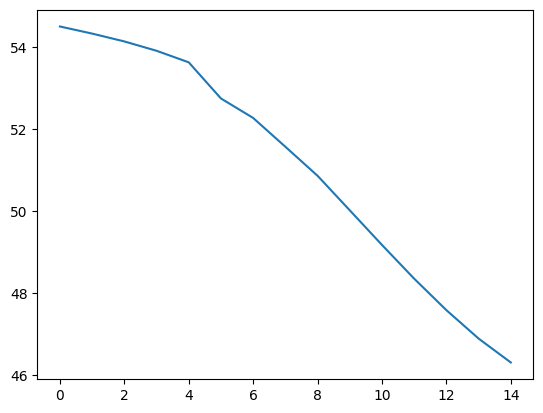

In [37]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [38]:
xtry = torch.tensor(np.array([1,5,0,1,2,2,1]), dtype=torch.float32);xtry

tensor([1., 5., 0., 1., 2., 2., 1.])

In [39]:
x_tt = scaler.transform(xtry.reshape(1,-1))

In [40]:
x_ttt = torch.tensor(x_tt, dtype=torch.float32)

In [29]:
y_pred = model(x_ttt)
mse = loss_fn(y_pred, Y_test)
mse = float(mse)
print(mse)
print(best_mse)
print(y_pred)

77.89827728271484
54.485374450683594
tensor([[ 8.0567, 15.7728, 23.9318, 31.5578, 38.9150, 46.2274, 26.3684]],
       grad_fn=<AddmmBackward0>)


/usr/local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([606, 7])) that is different to the input size (torch.Size([1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
